# Random forest fitting

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("DataSets/weatherAUSProcessed.csv")

train_df, test_df = train_test_split(df, test_size=0.25, random_state=452)

In [19]:
from sklearn.ensemble import RandomForestClassifier

train_x = train_df[['Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity3pm', 'WindDir3pm', 'RainTomorrow']]
train_y = train_df['RainTomorrow']

randomforest_classifier = RandomForestClassifier(n_estimators = 10)
randomforest_classifier.fit(train_x, train_y)

RandomForestClassifier(n_estimators=10)

## Test against Training set

In [20]:
from sklearn.metrics import confusion_matrix

y_predicted = randomforest_classifier.predict(train_x)
matrix = confusion_matrix(train_y, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print ("Accuracy is ", accuracy_score(train_y, y_predicted))
print ("Precision is ", precision_score(train_y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(train_y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(train_y, y_predicted, average="weighted"))

[[10691     0]
 [    0  2809]]
Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


### Result 1
With this result it is highly likely that the model is over fitting. To confirm we can test again using the test set.

## Test against test set

In [21]:
test_x = test_df[['Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity3pm', 'WindDir3pm', 'RainTomorrow']]
test_y = test_df['RainTomorrow']

y_predicted = randomforest_classifier.predict(test_x)
matrix = confusion_matrix(test_y, y_predicted)
print(matrix)

print ("Accuracy is ", accuracy_score(test_y, y_predicted))
print ("Precision is ", precision_score(test_y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(test_y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(test_y, y_predicted, average="weighted"))

[[3503    0]
 [   0  997]]
Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


## Result 2
We get a perfect score again, this time with the test set. Hmmm...
Try a cross validation instead.

## Test using cross-validation

In [22]:
from sklearn.model_selection import KFold

validation_accuracy = []
validation_f1 =[]

X = df[['Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity3pm', 'WindDir3pm', 'RainTomorrow']]
y = df['RainTomorrow']

fold_and_validate = KFold(n_splits=5, shuffle=True, random_state=145)
for train_set_indices, validation_set_indices in fold_and_validate.split(X):
    cv_train_set = X.iloc[train_set_indices]
    cv_train_target = y.iloc[train_set_indices]
    
    cv_rf = RandomForestClassifier(n_estimators = 5)
    cv_rf.fit(cv_train_set, cv_train_target)
    
    cv_xvalidation = X.iloc[validation_set_indices]
    cv_y_true = y.iloc[validation_set_indices]
    cv_y_predicted = cv_rf.predict(cv_xvalidation)
    
    cv_accuracy_score = accuracy_score(cv_y_true, cv_y_predicted)
    cv_f1_score = f1_score(cv_y_true, cv_y_predicted,  average="weighted")
    validation_accuracy.append(cv_accuracy_score)
    validation_f1.append(cv_f1_score)
    
print("Cross validation accuracies are: ", validation_accuracy)
print("Cross validation f1 scores  are: ", validation_f1)
    

Cross validation accuracies are:  [1.0, 1.0, 1.0, 1.0, 1.0]
Cross validation f1 scores  are:  [1.0, 1.0, 1.0, 1.0, 1.0]


## Result 3
Cross validation also gives us a perfect match.

## Export Dot file

In [17]:
import os
from sklearn.tree import export_graphviz
from graphviz import Source

est_count = 0;
for estimator in randomforest_classifier.estimators_:
    export_graphviz(estimator, out_file='Images/tree' + str(est_count) + '.dot', 
                feature_names = ['Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity3pm', 'WindDir3pm', 'RainTomorrow'],
                class_names = 'RainTomorrow',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
    est_count = est_count + 1;


## Export Png

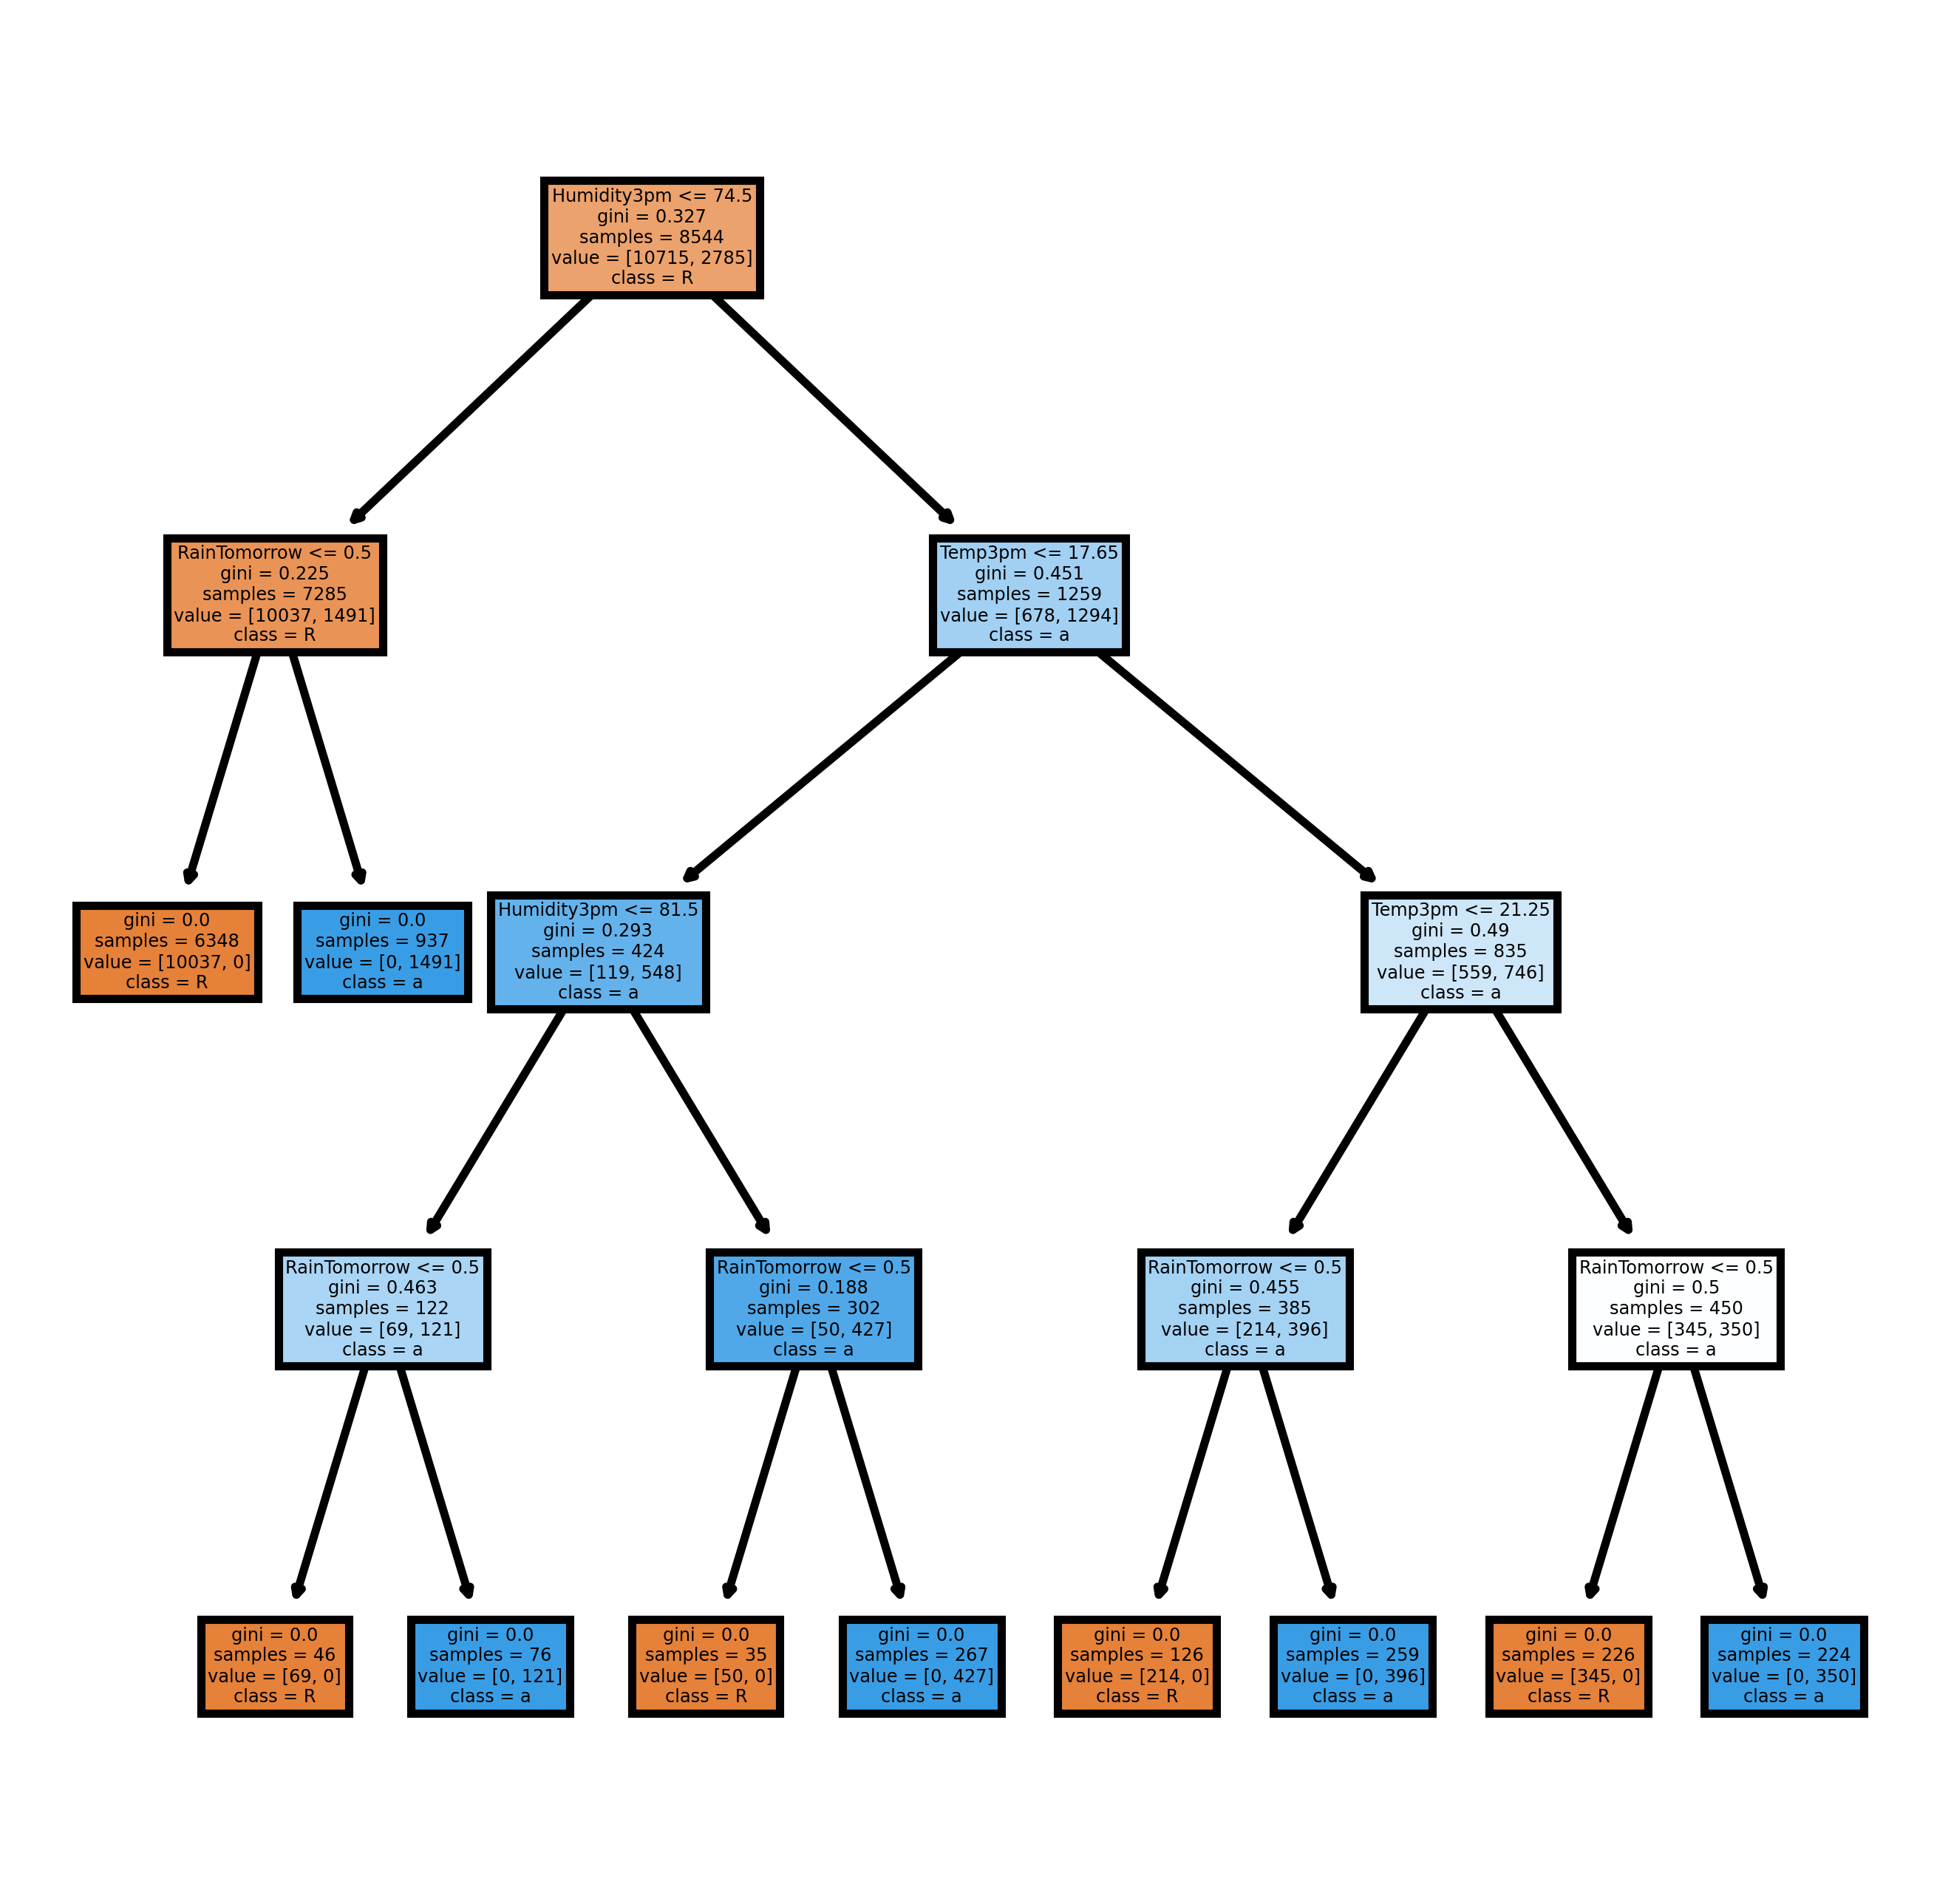

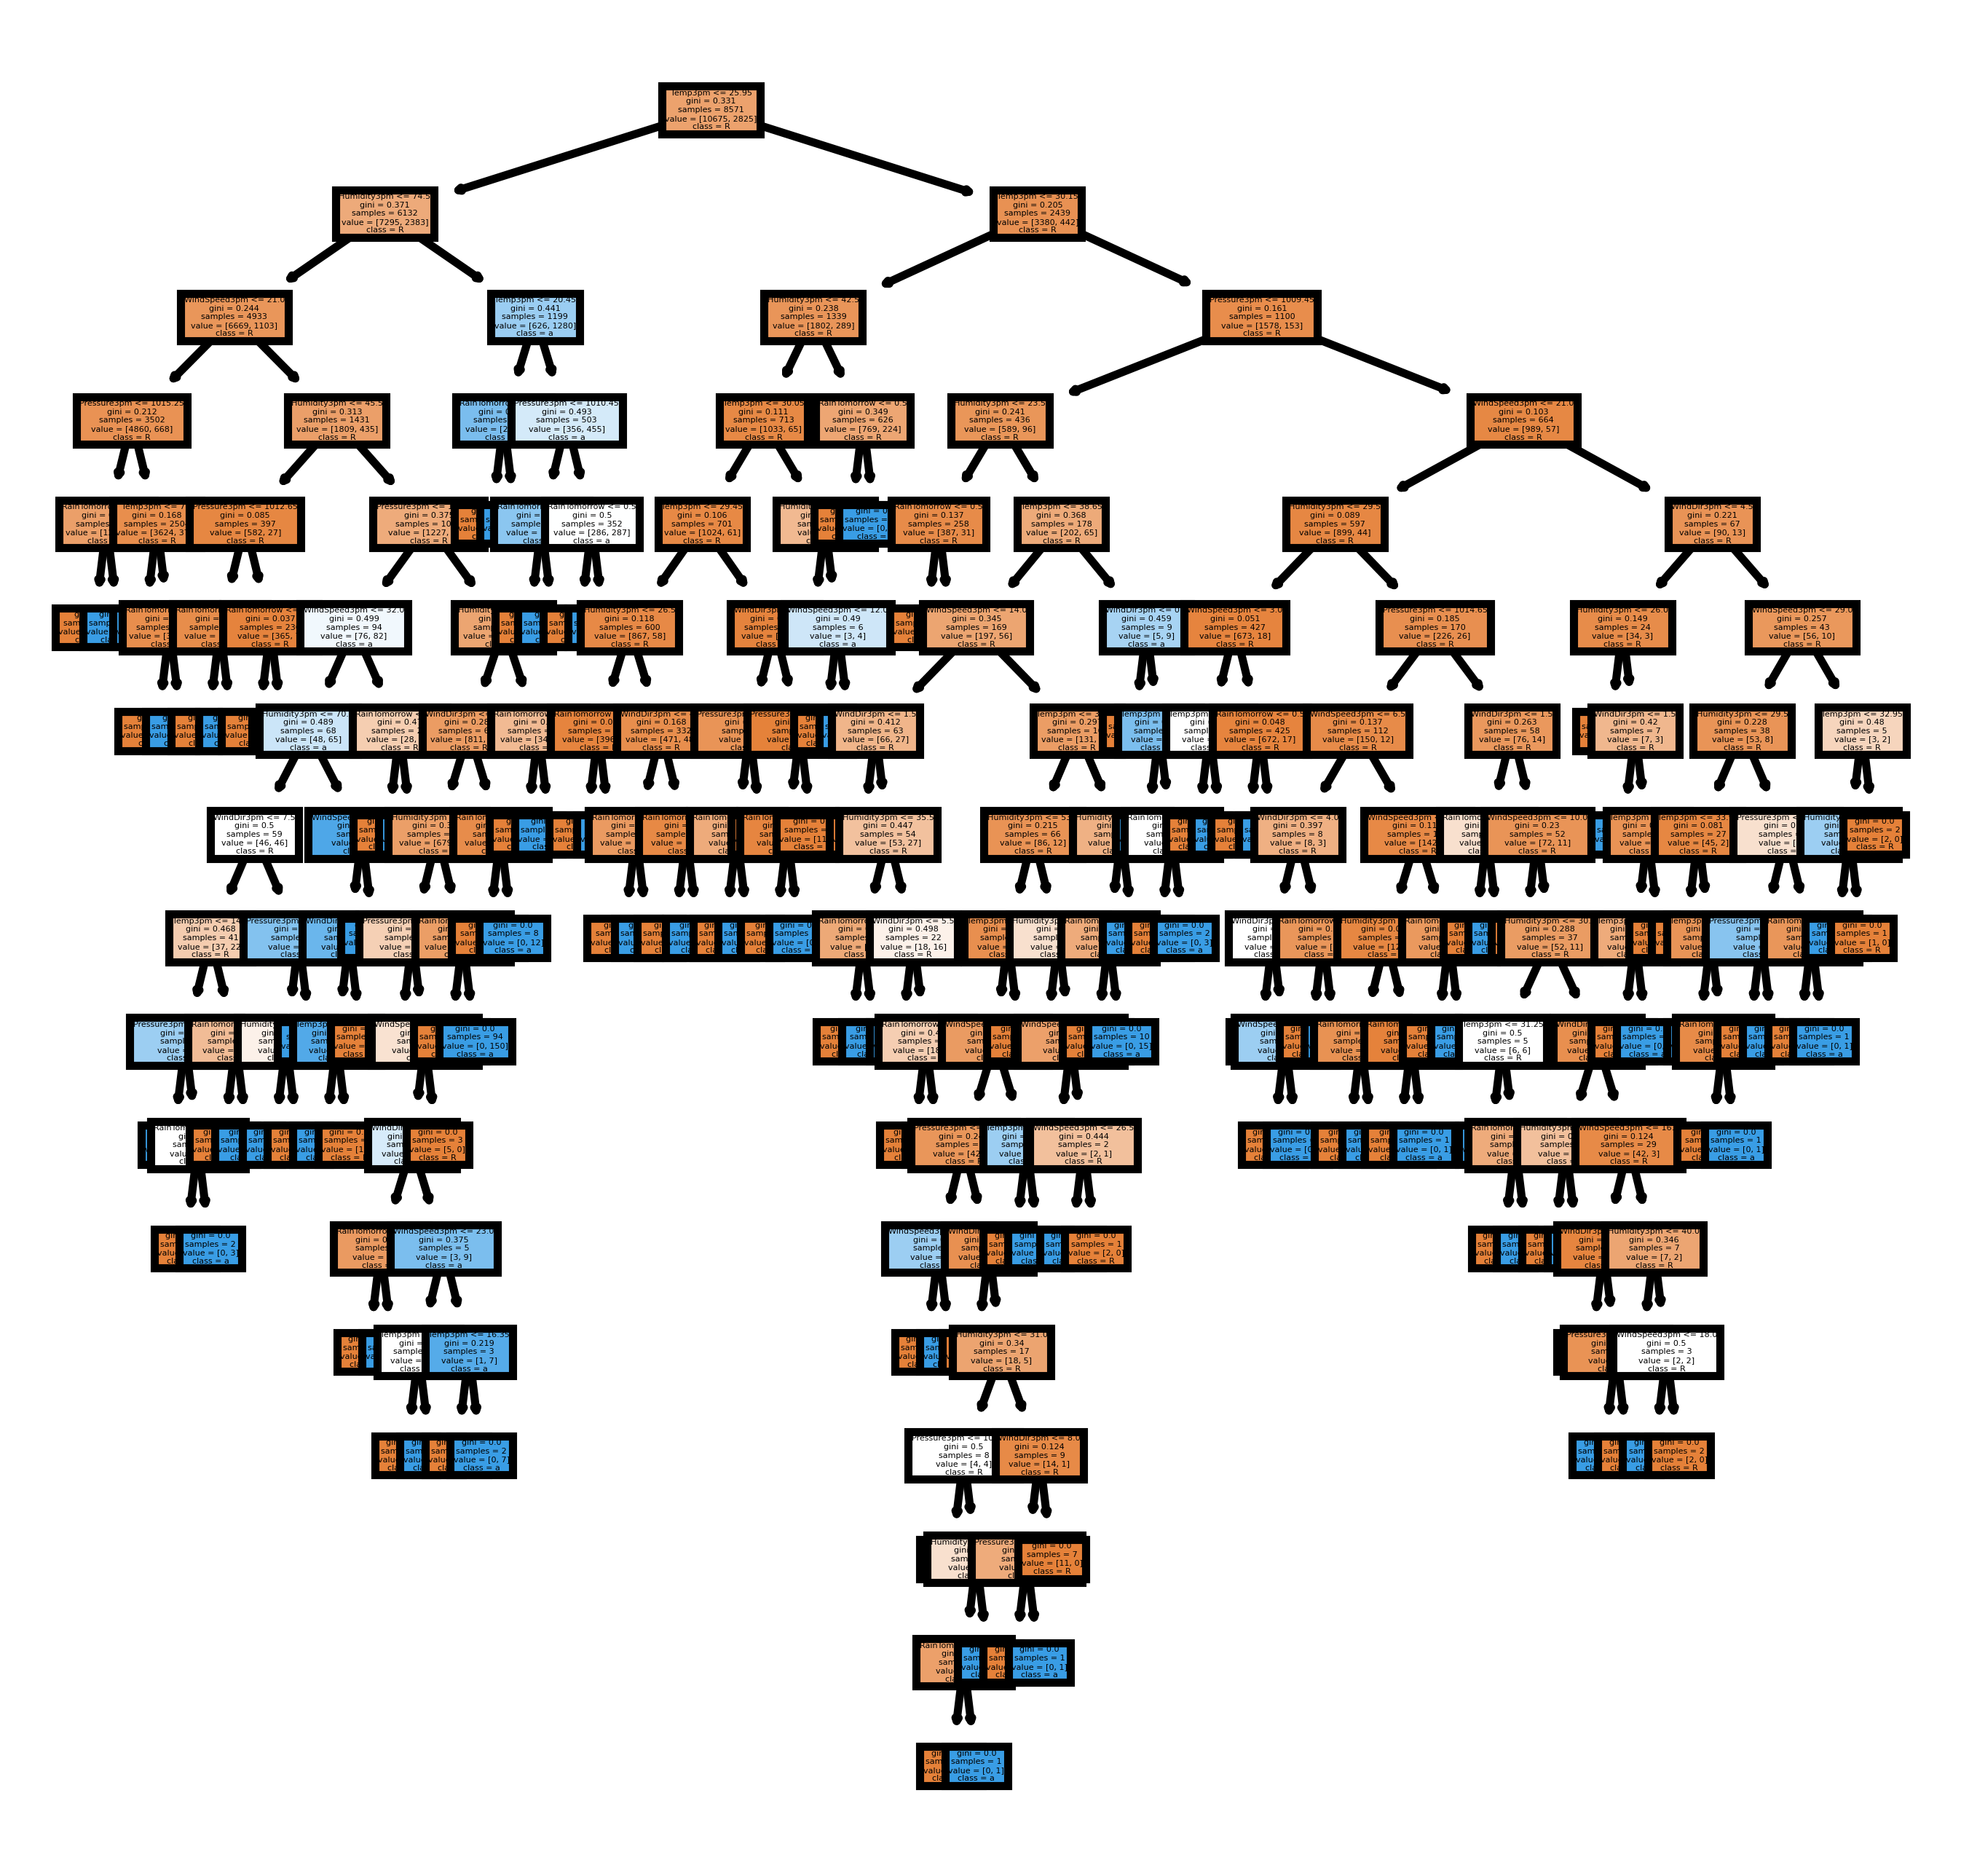

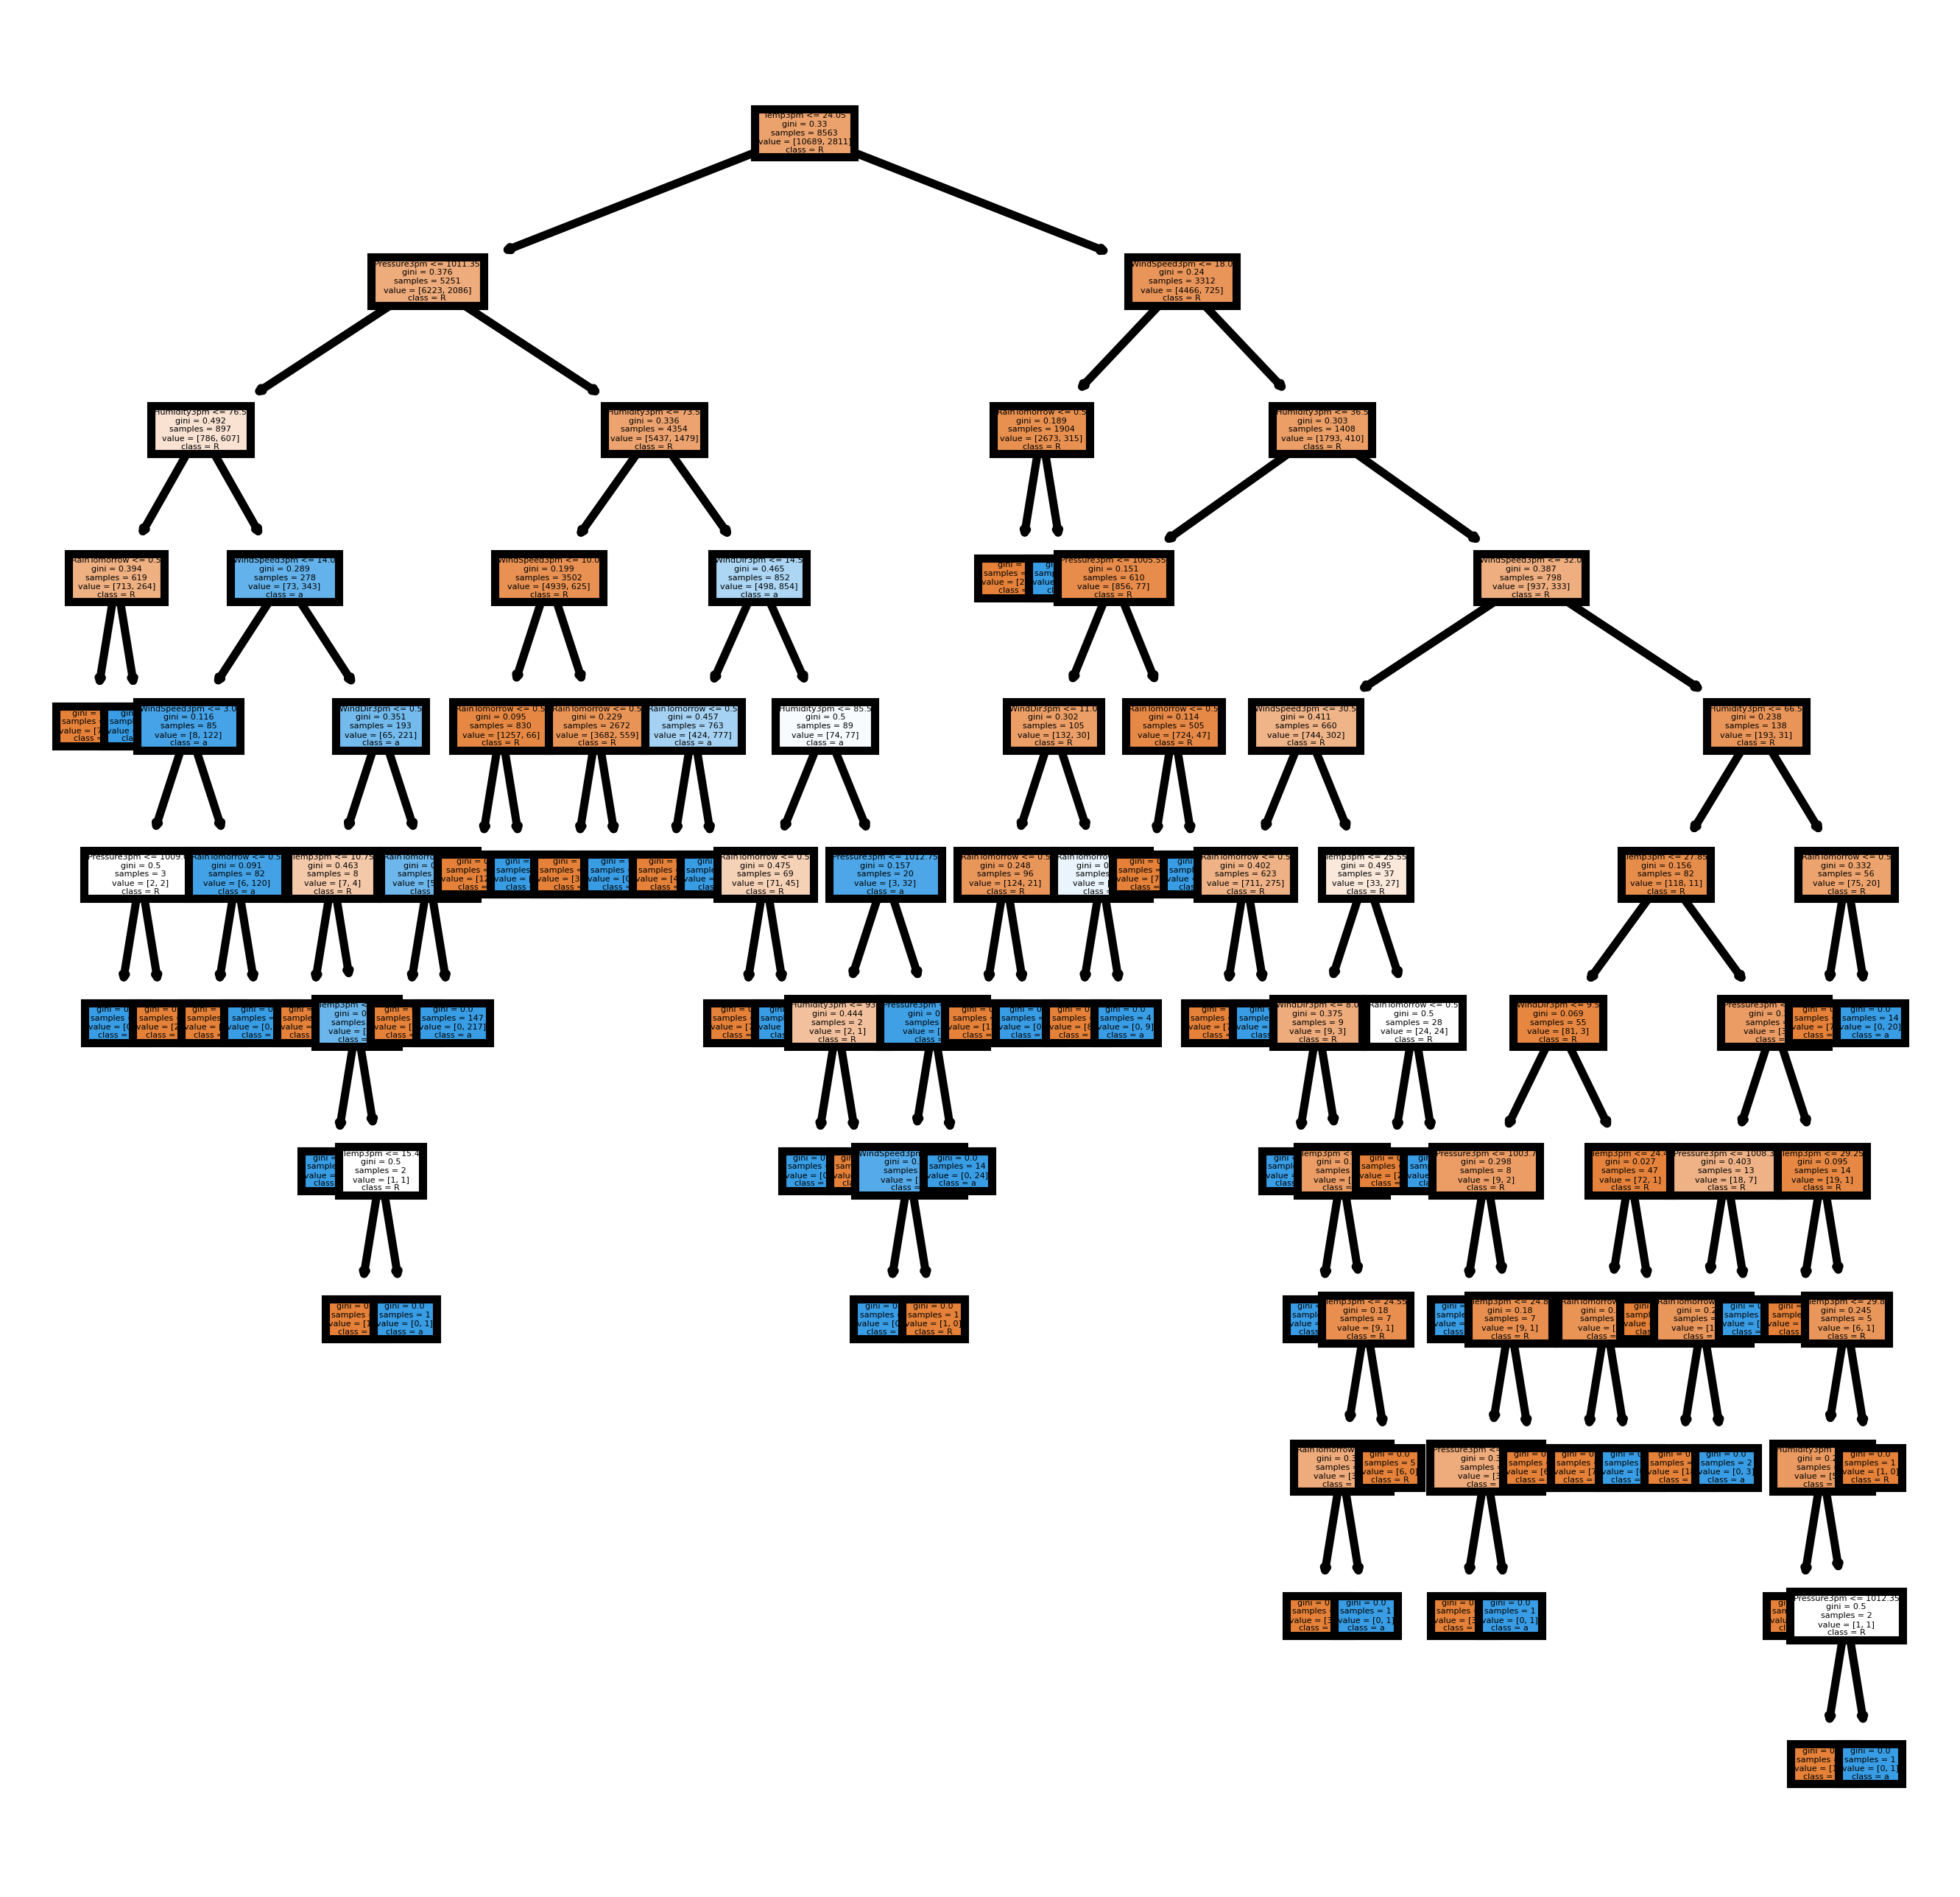

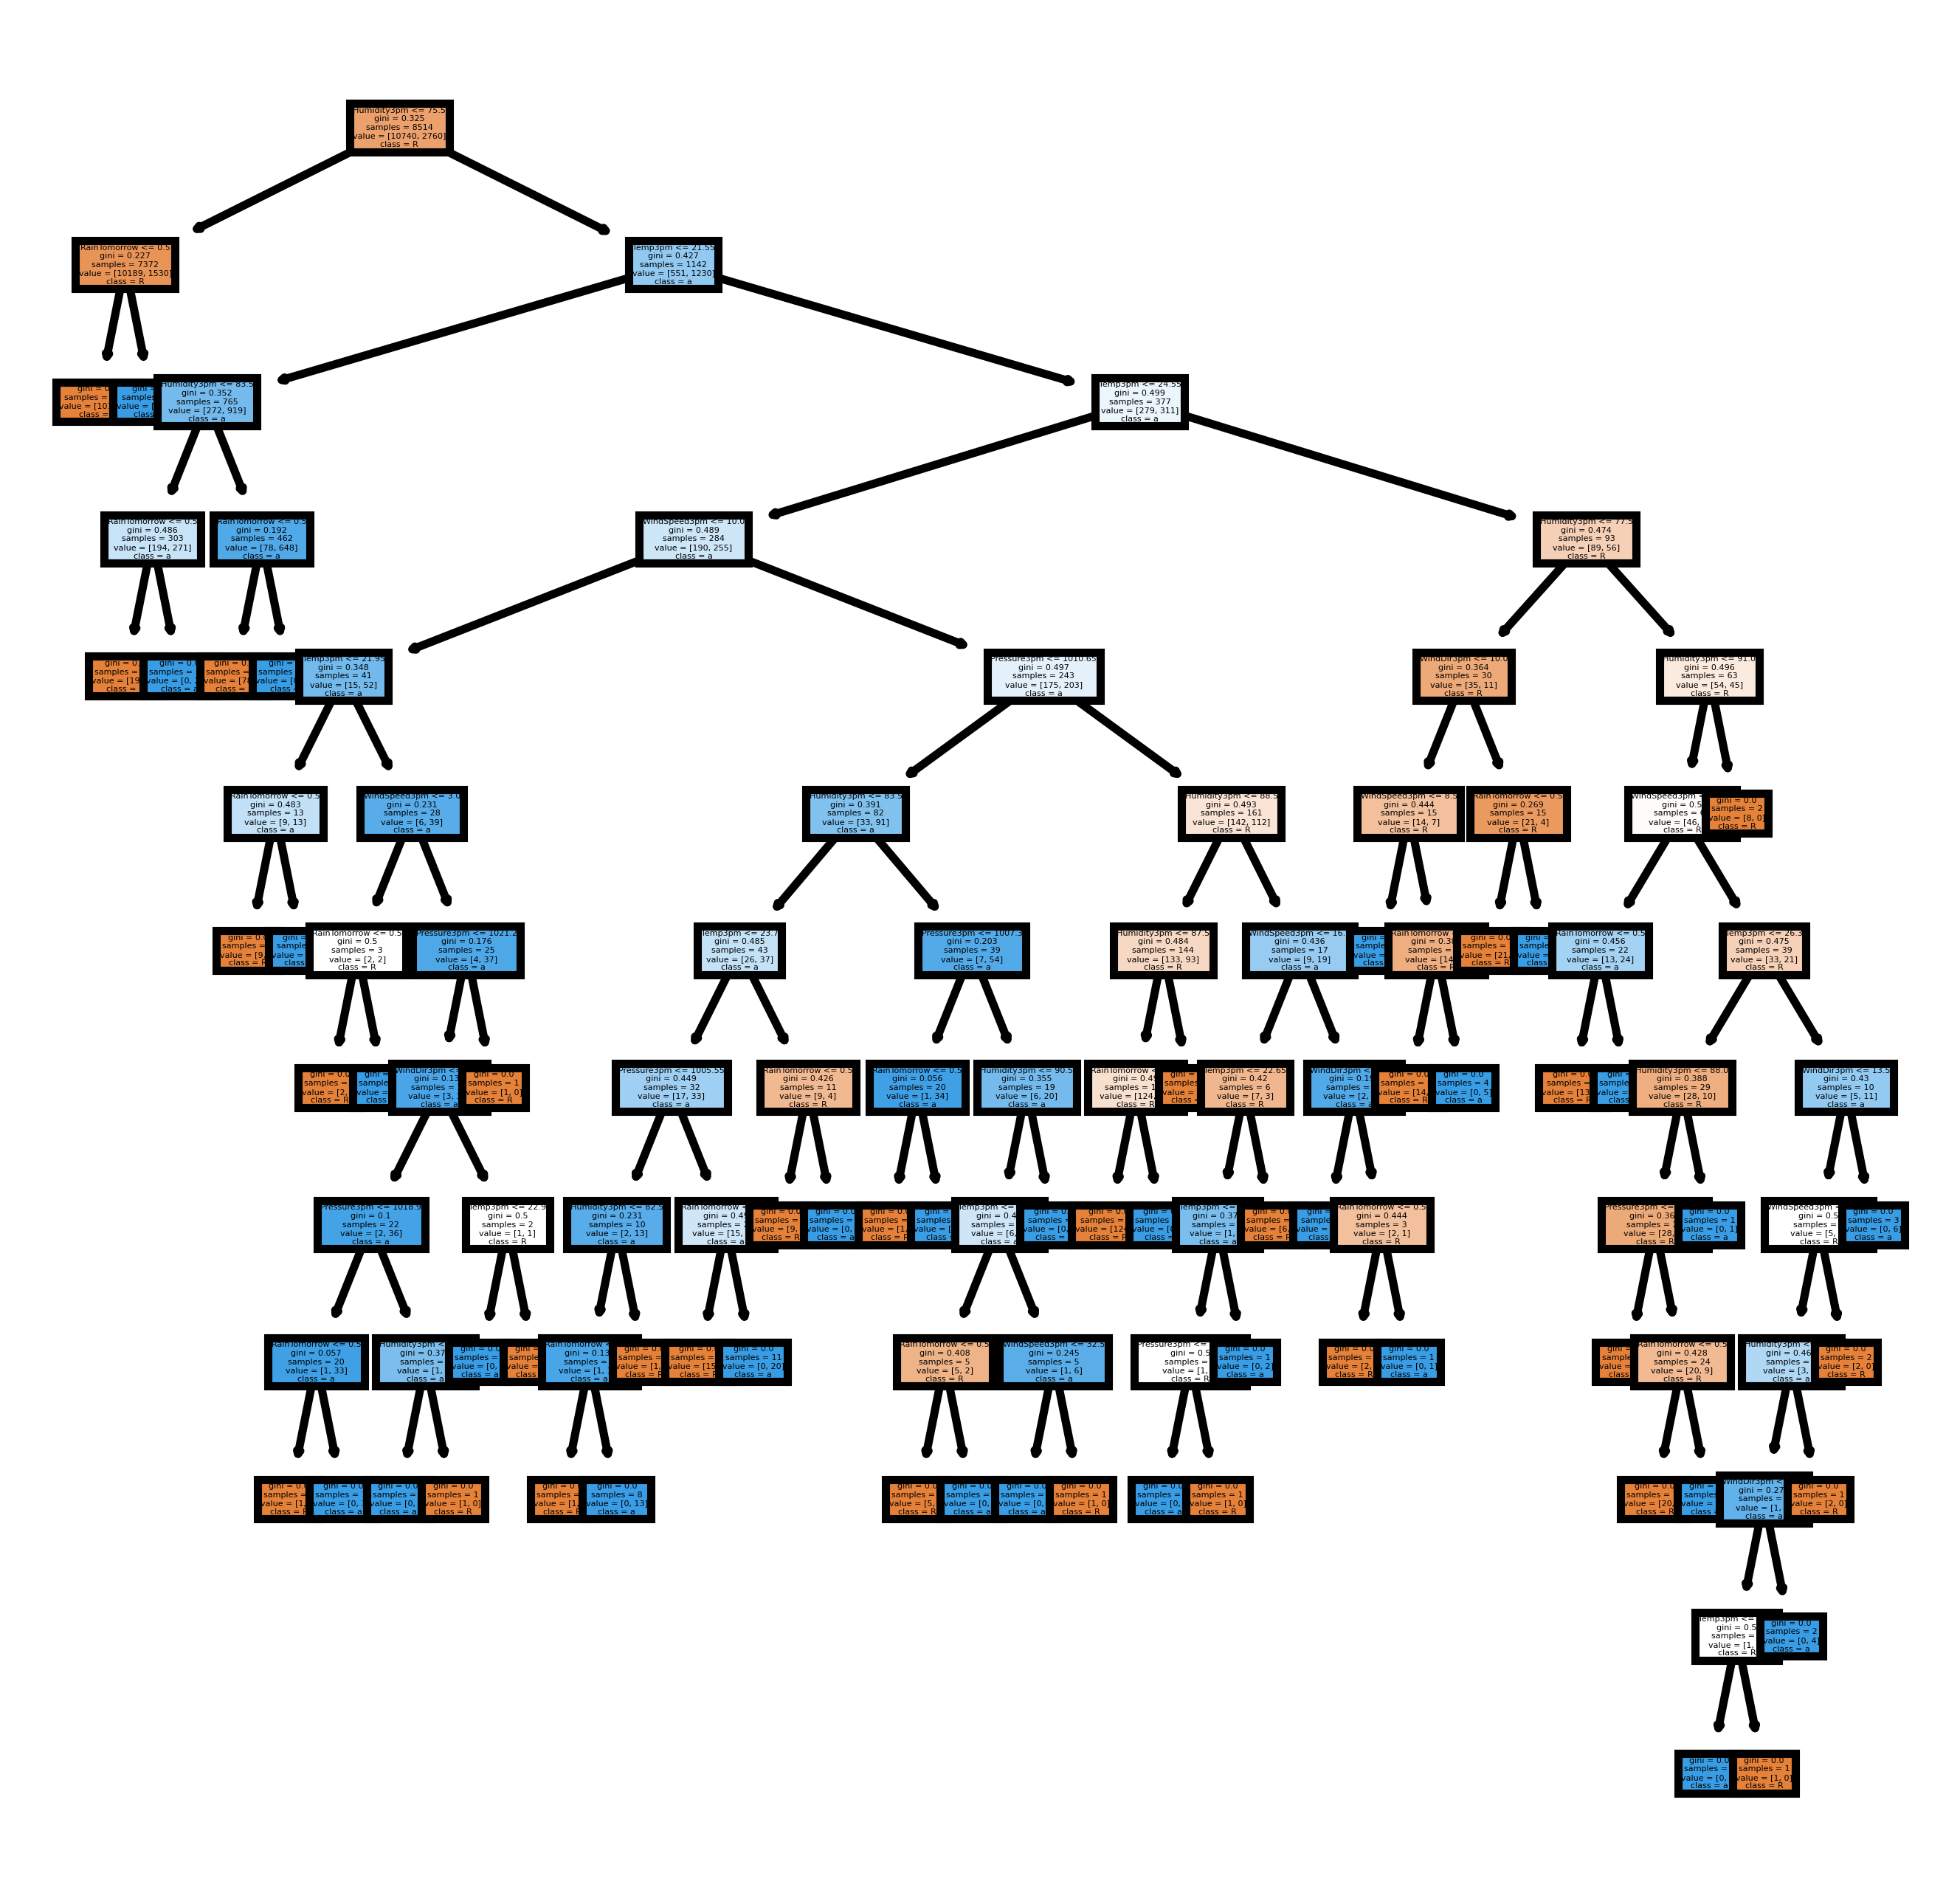

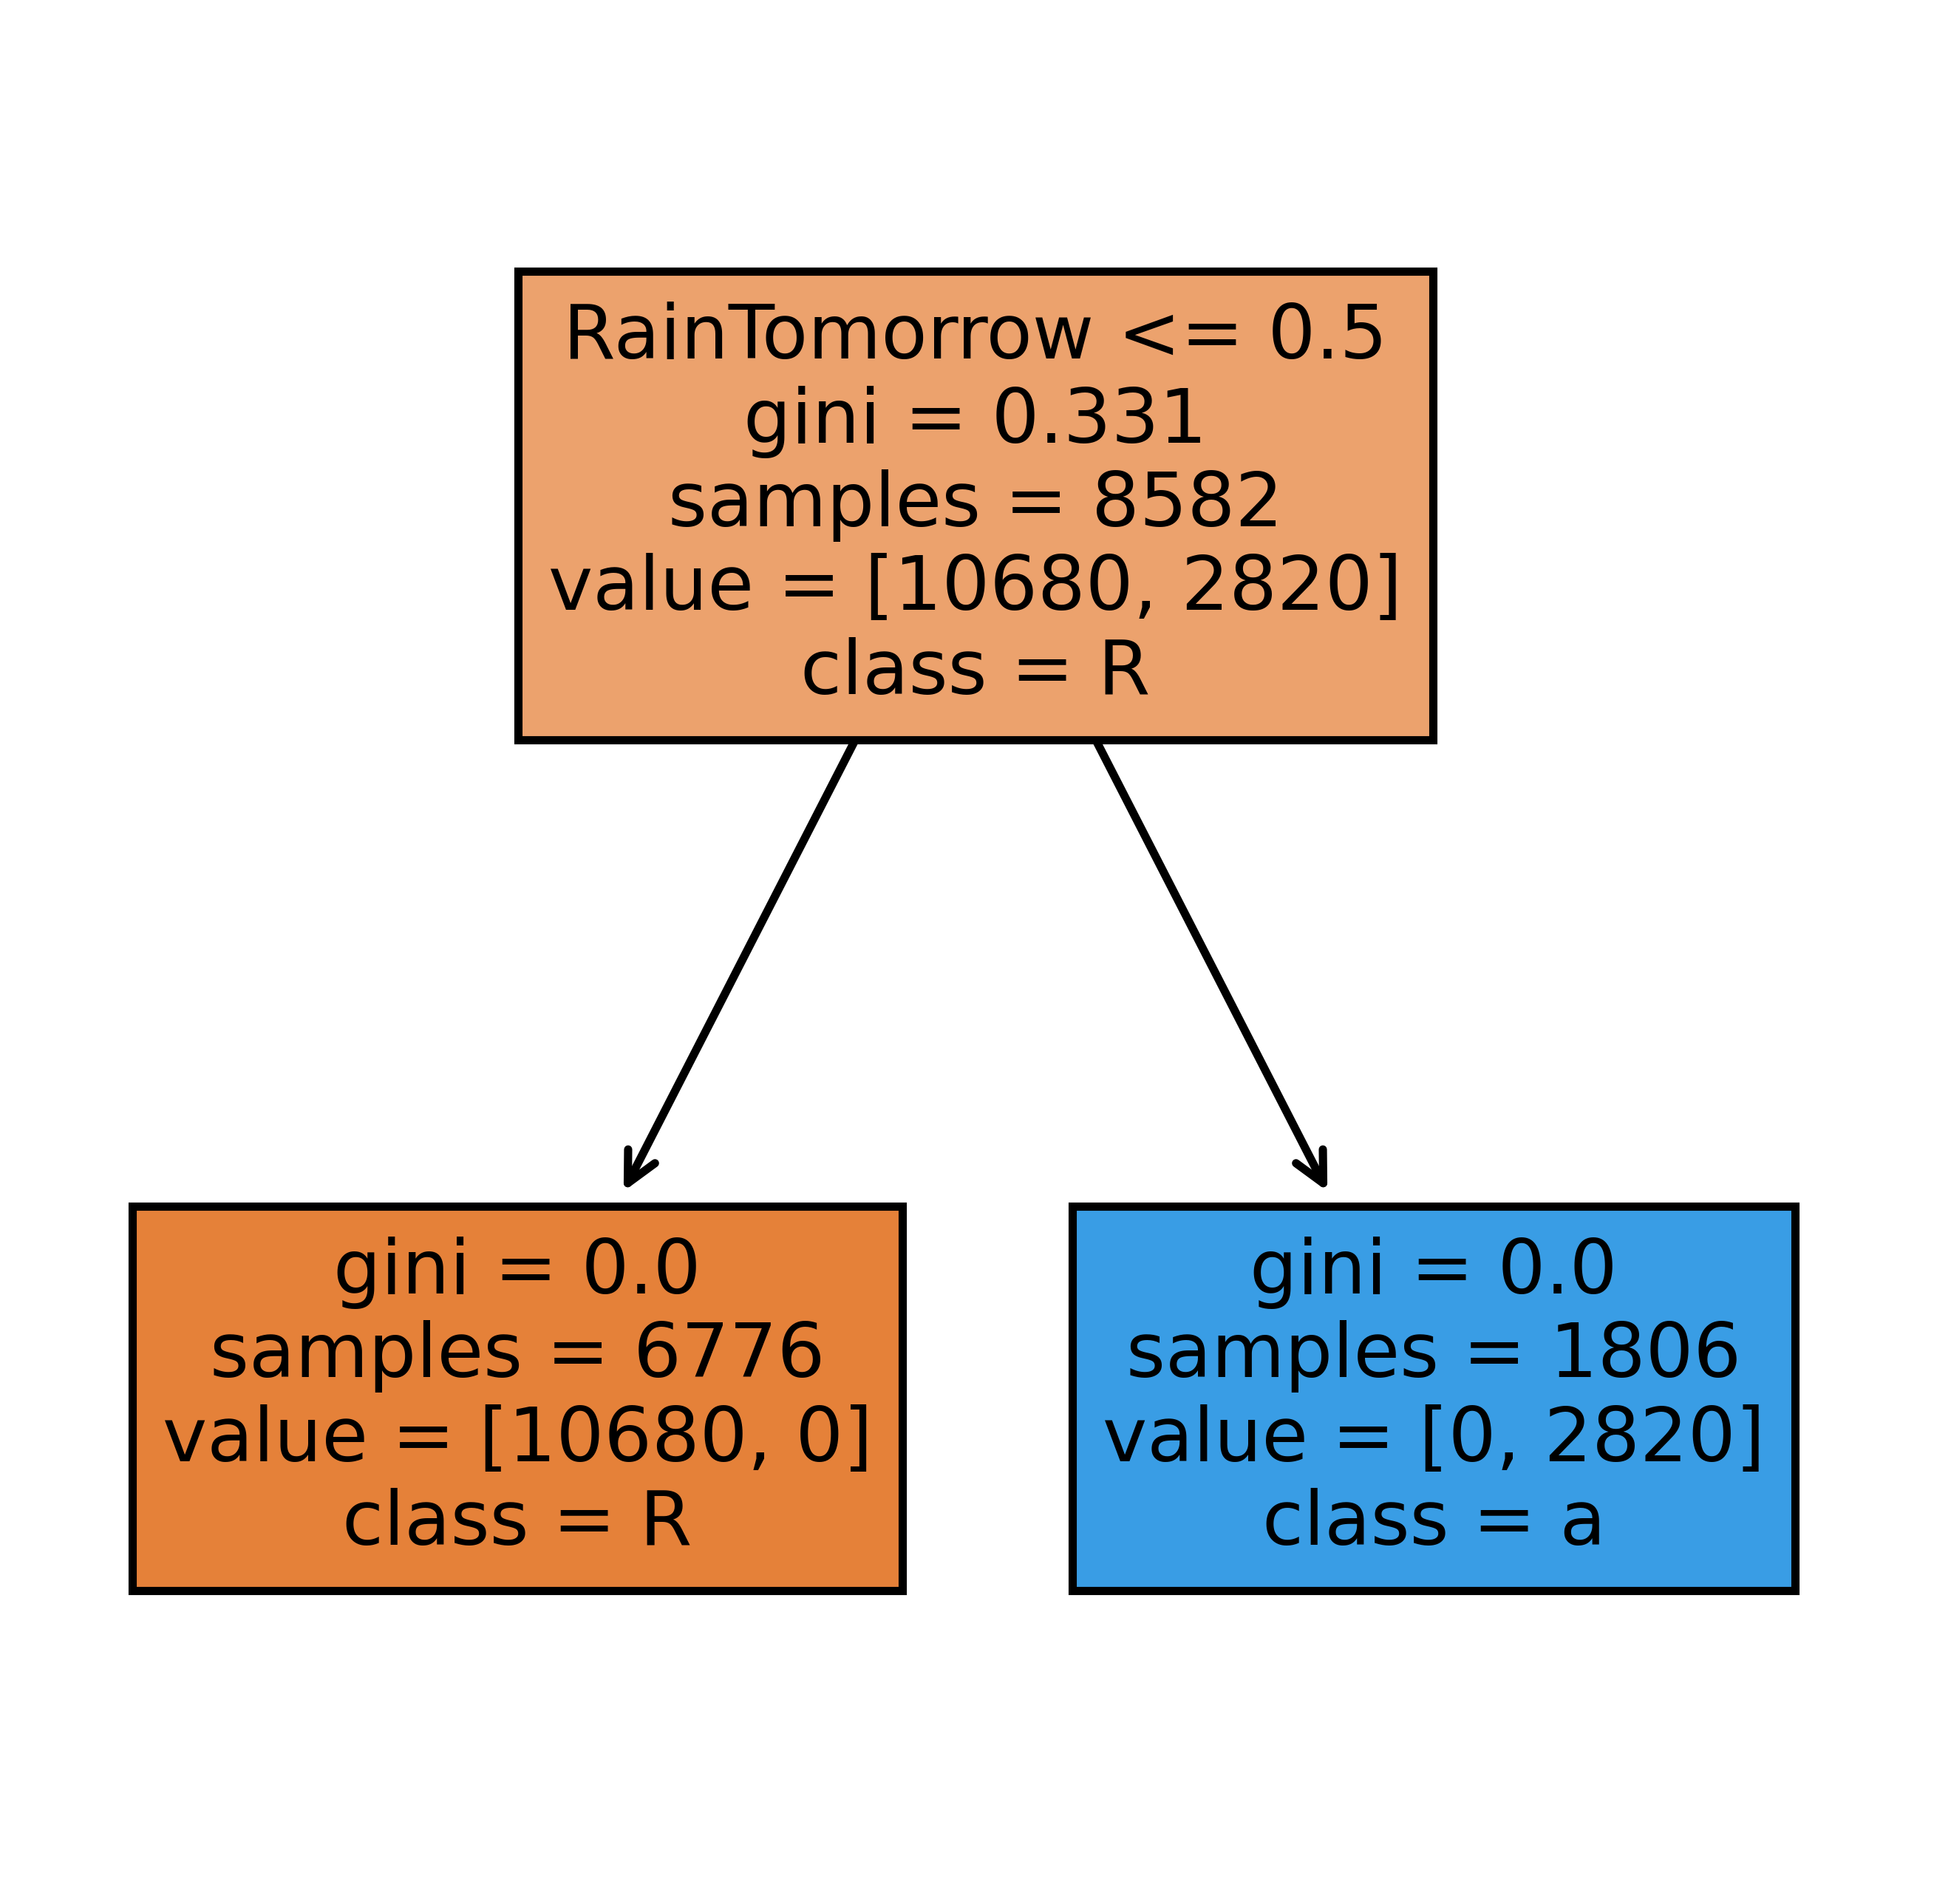

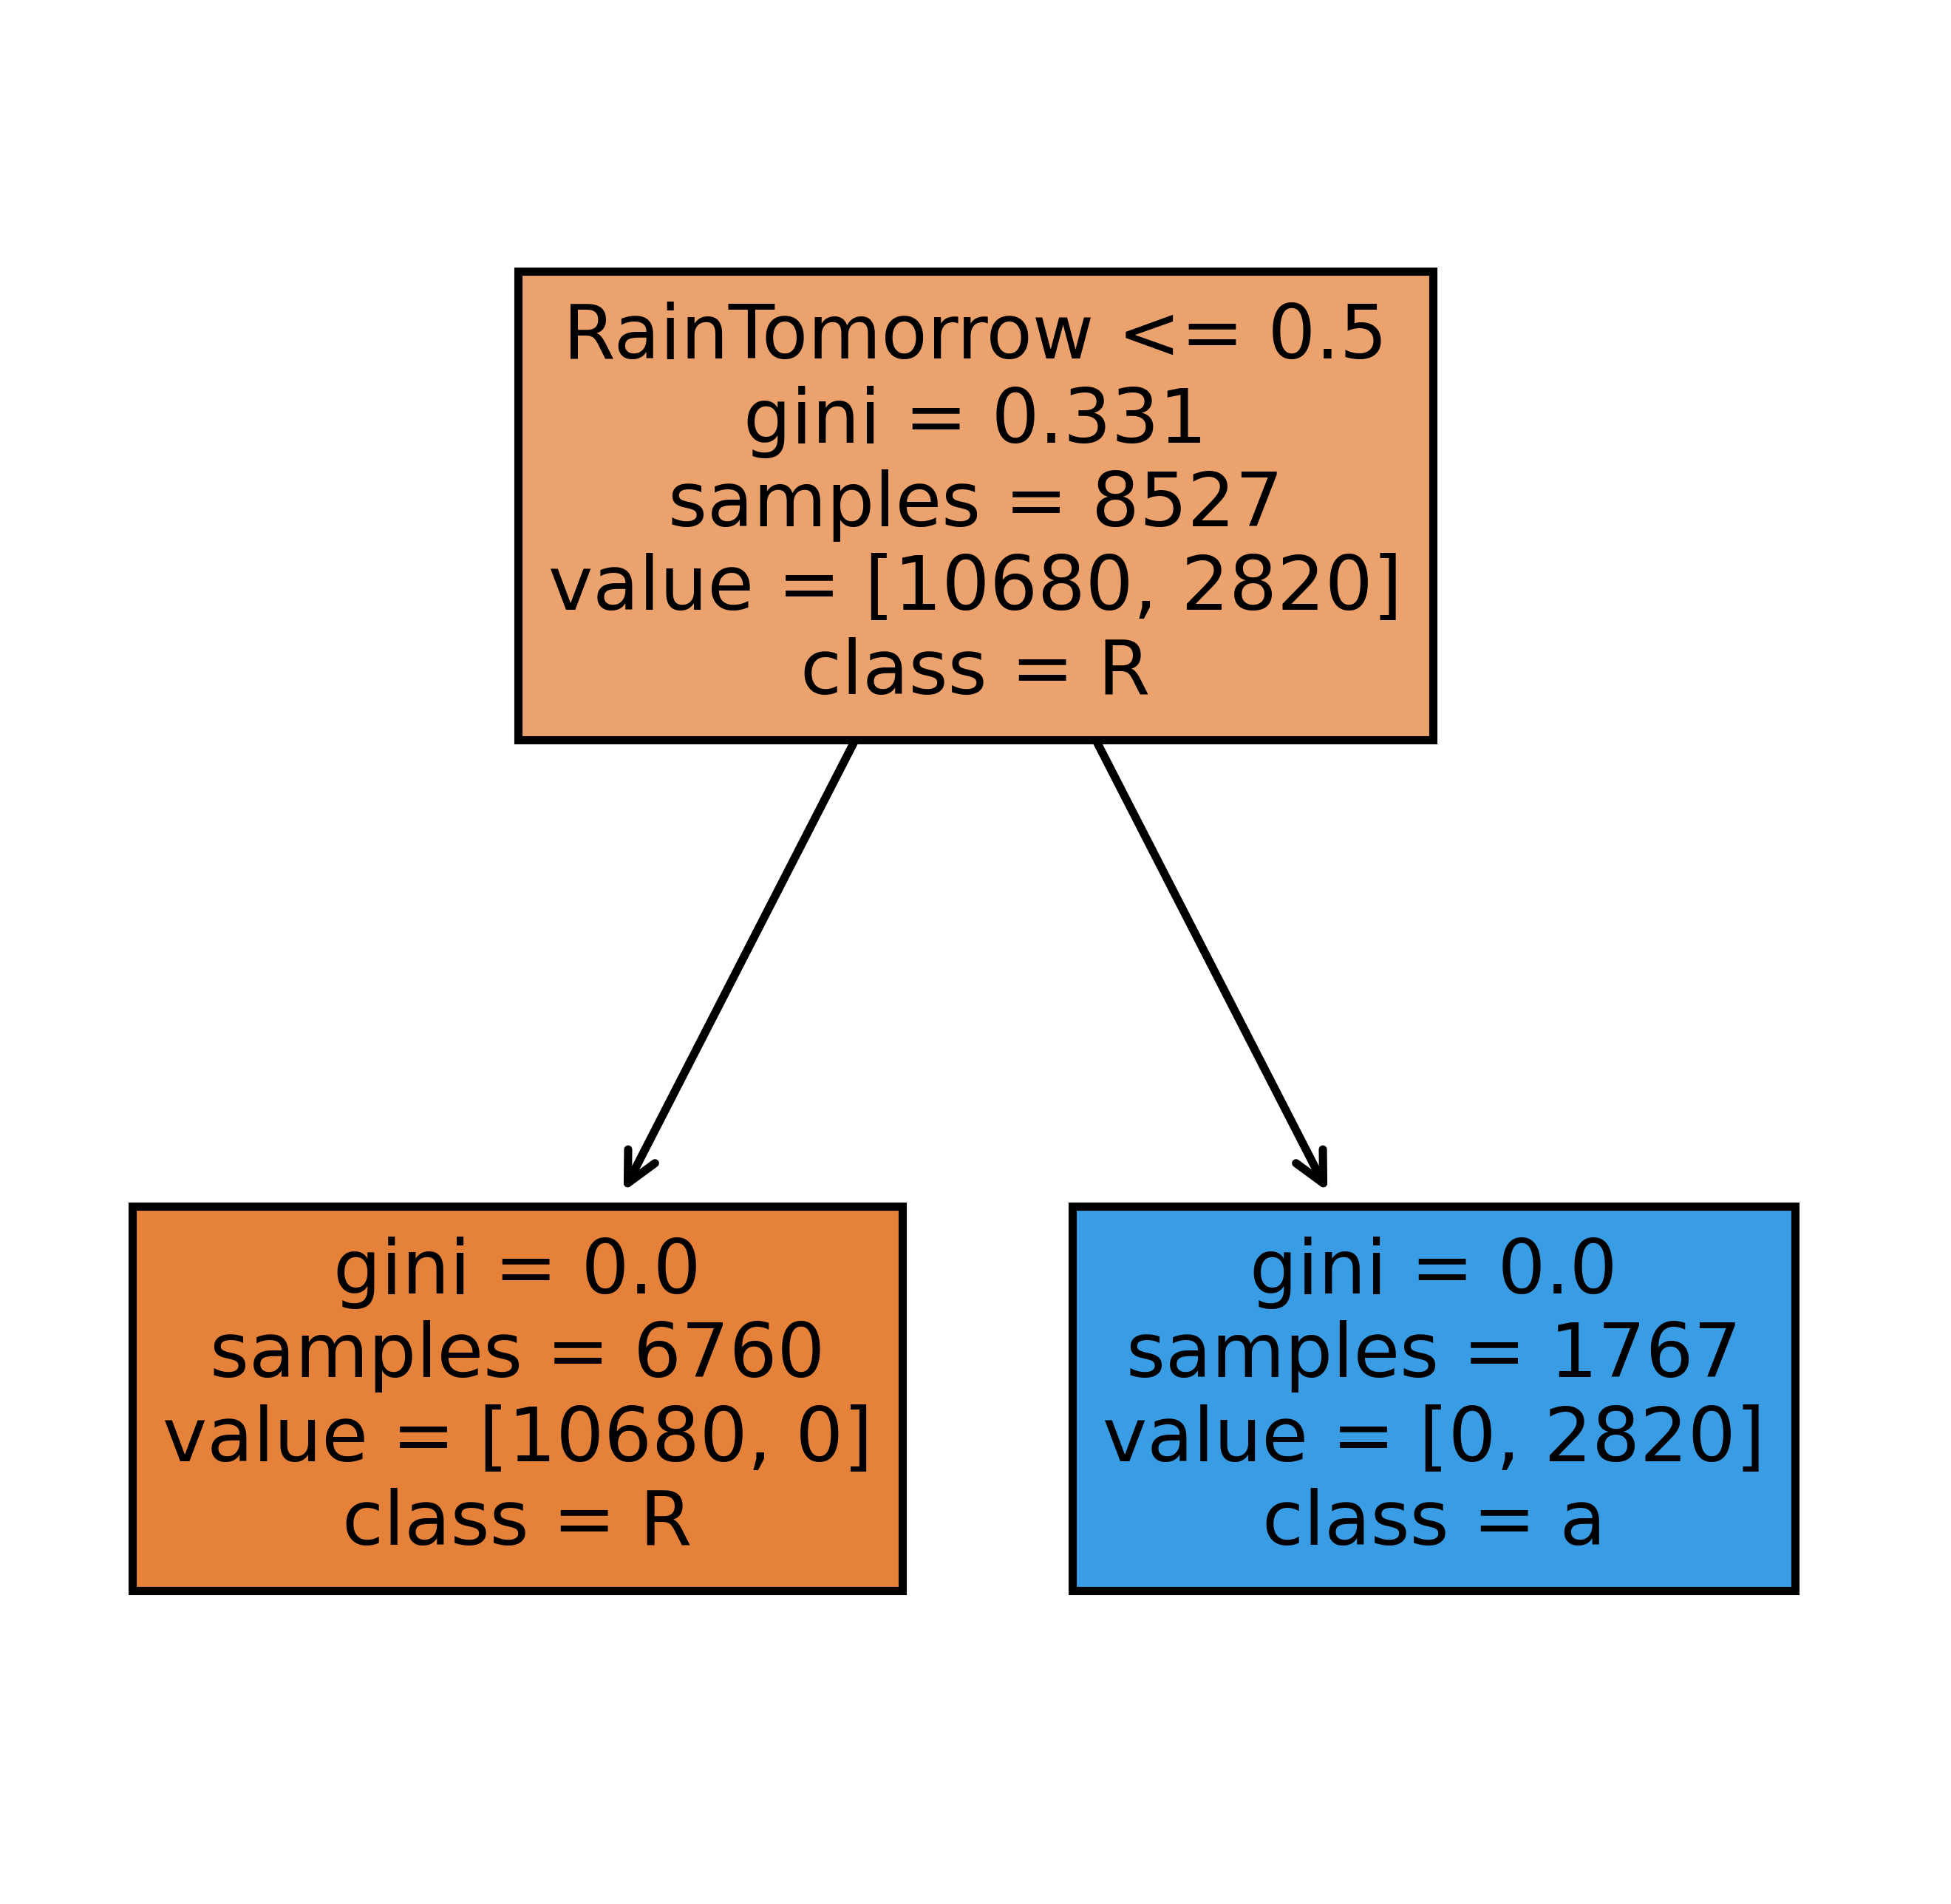

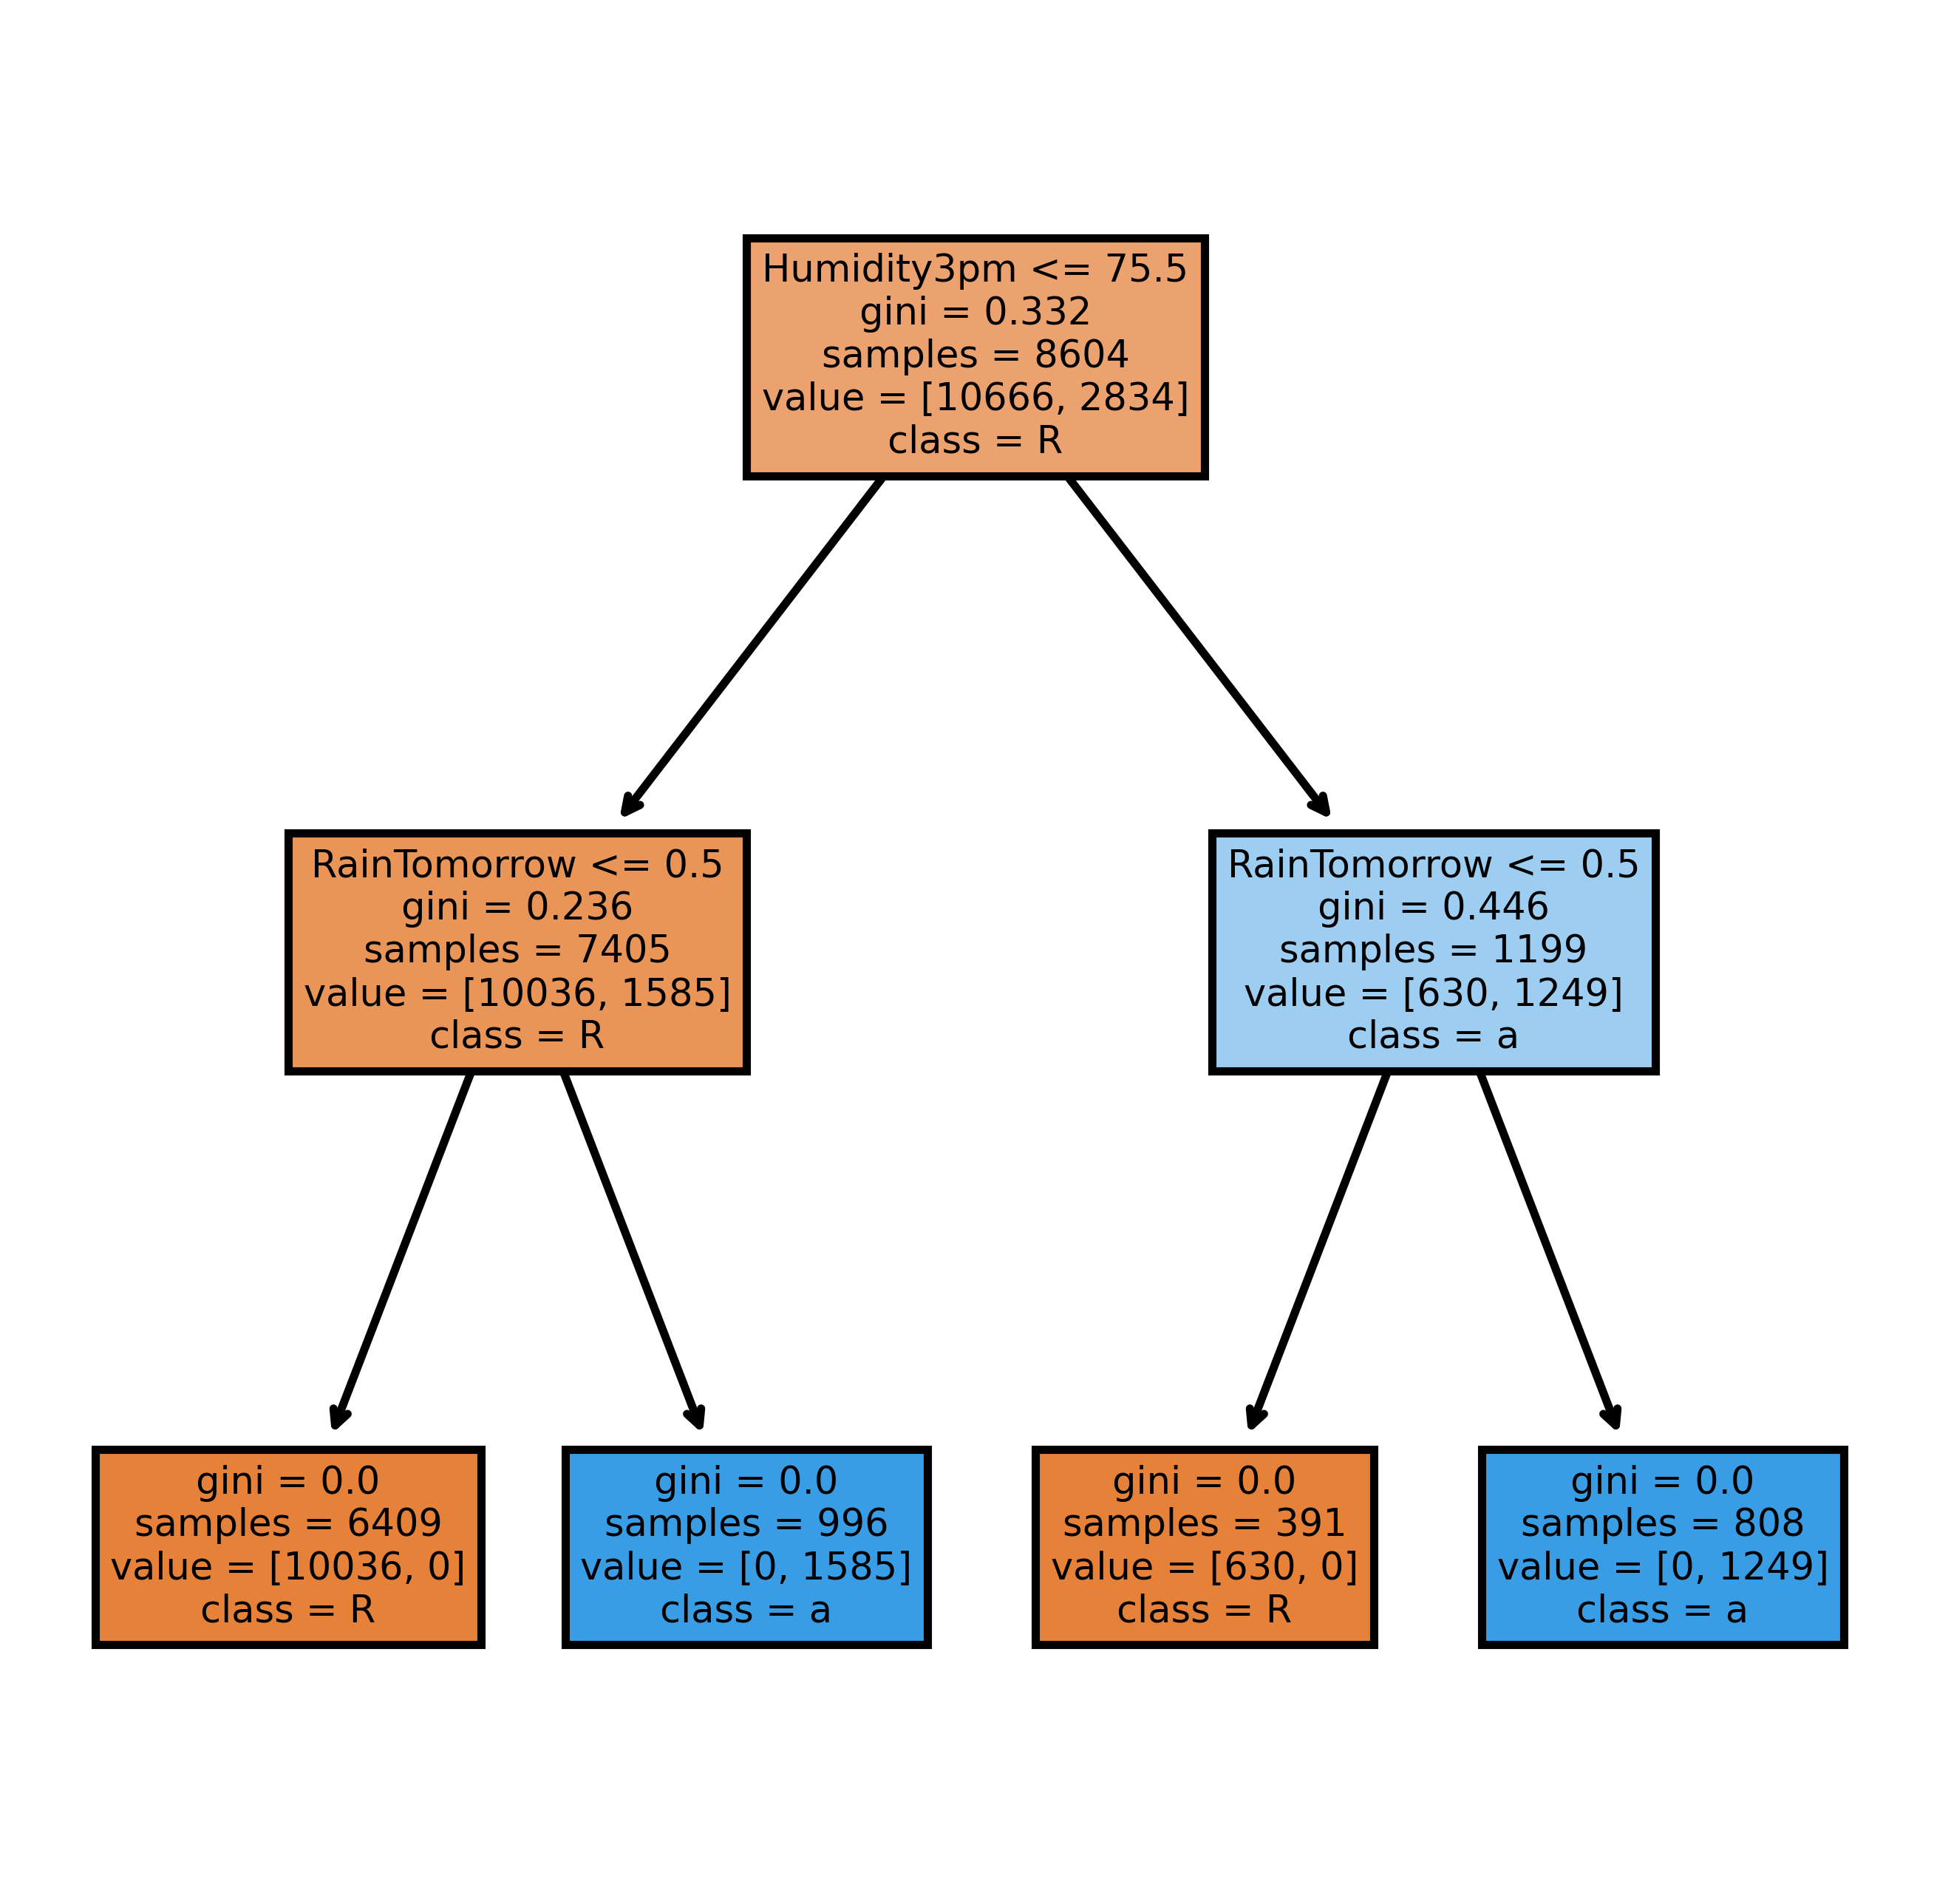

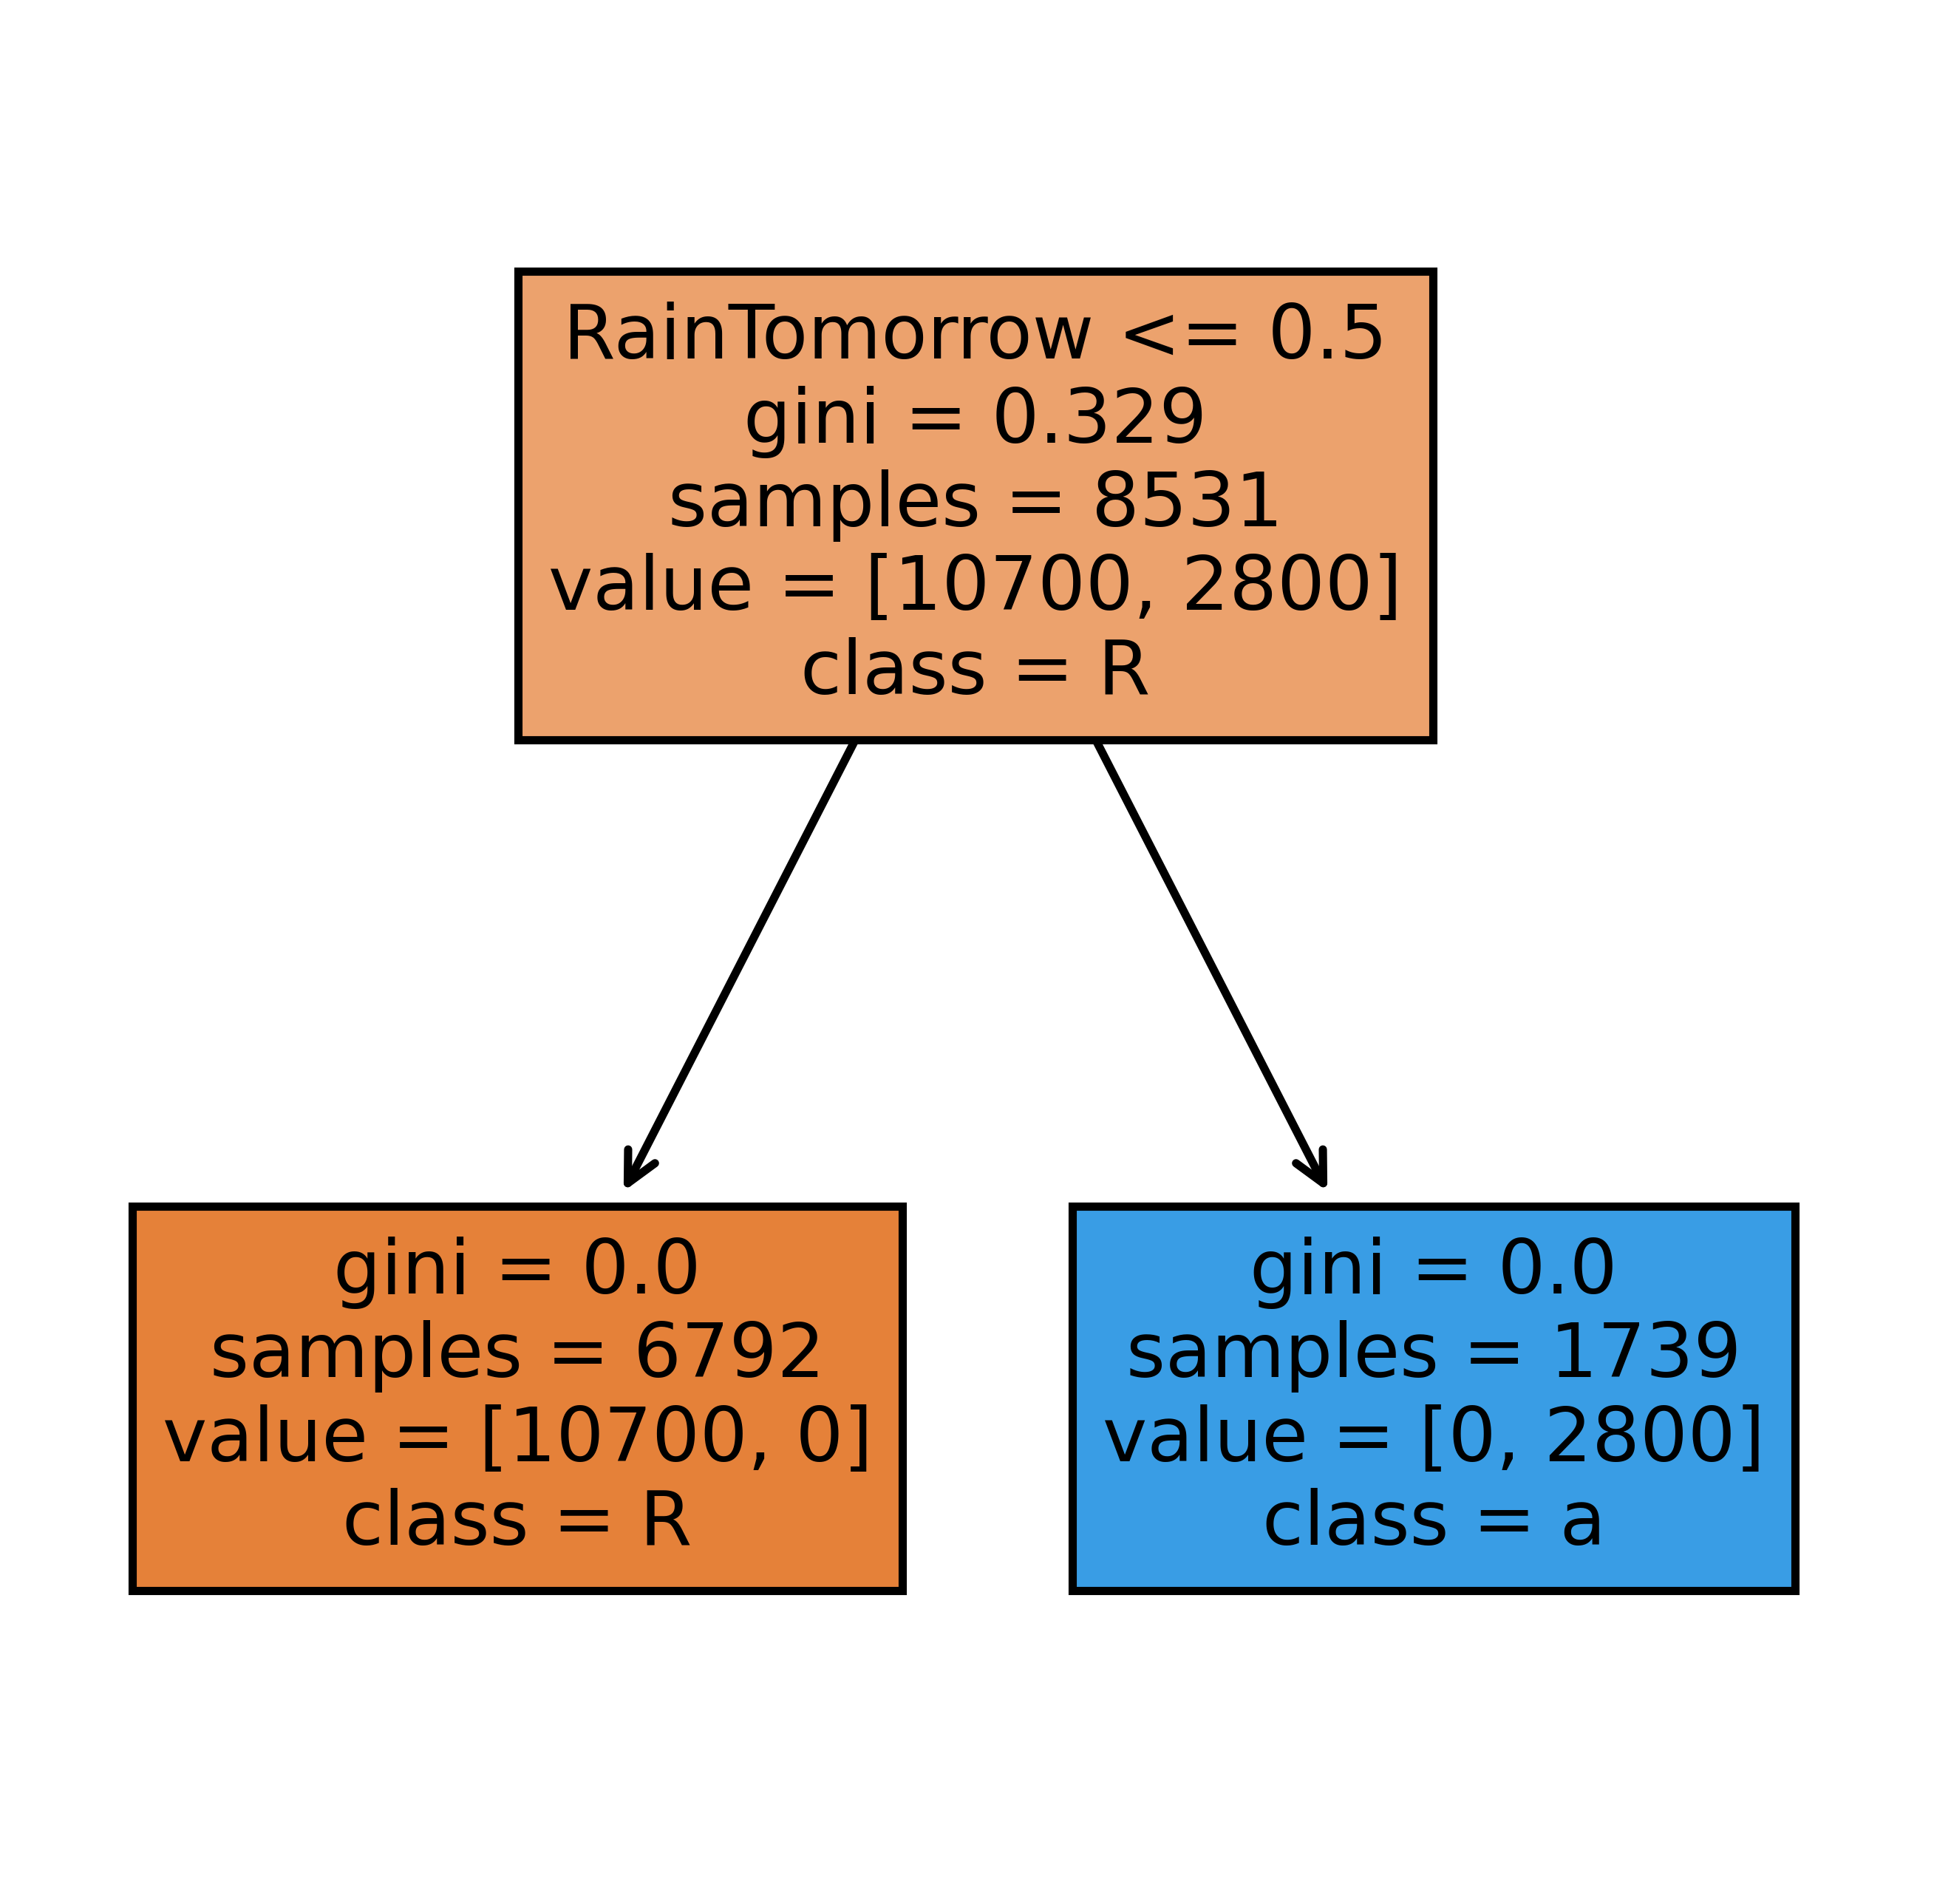

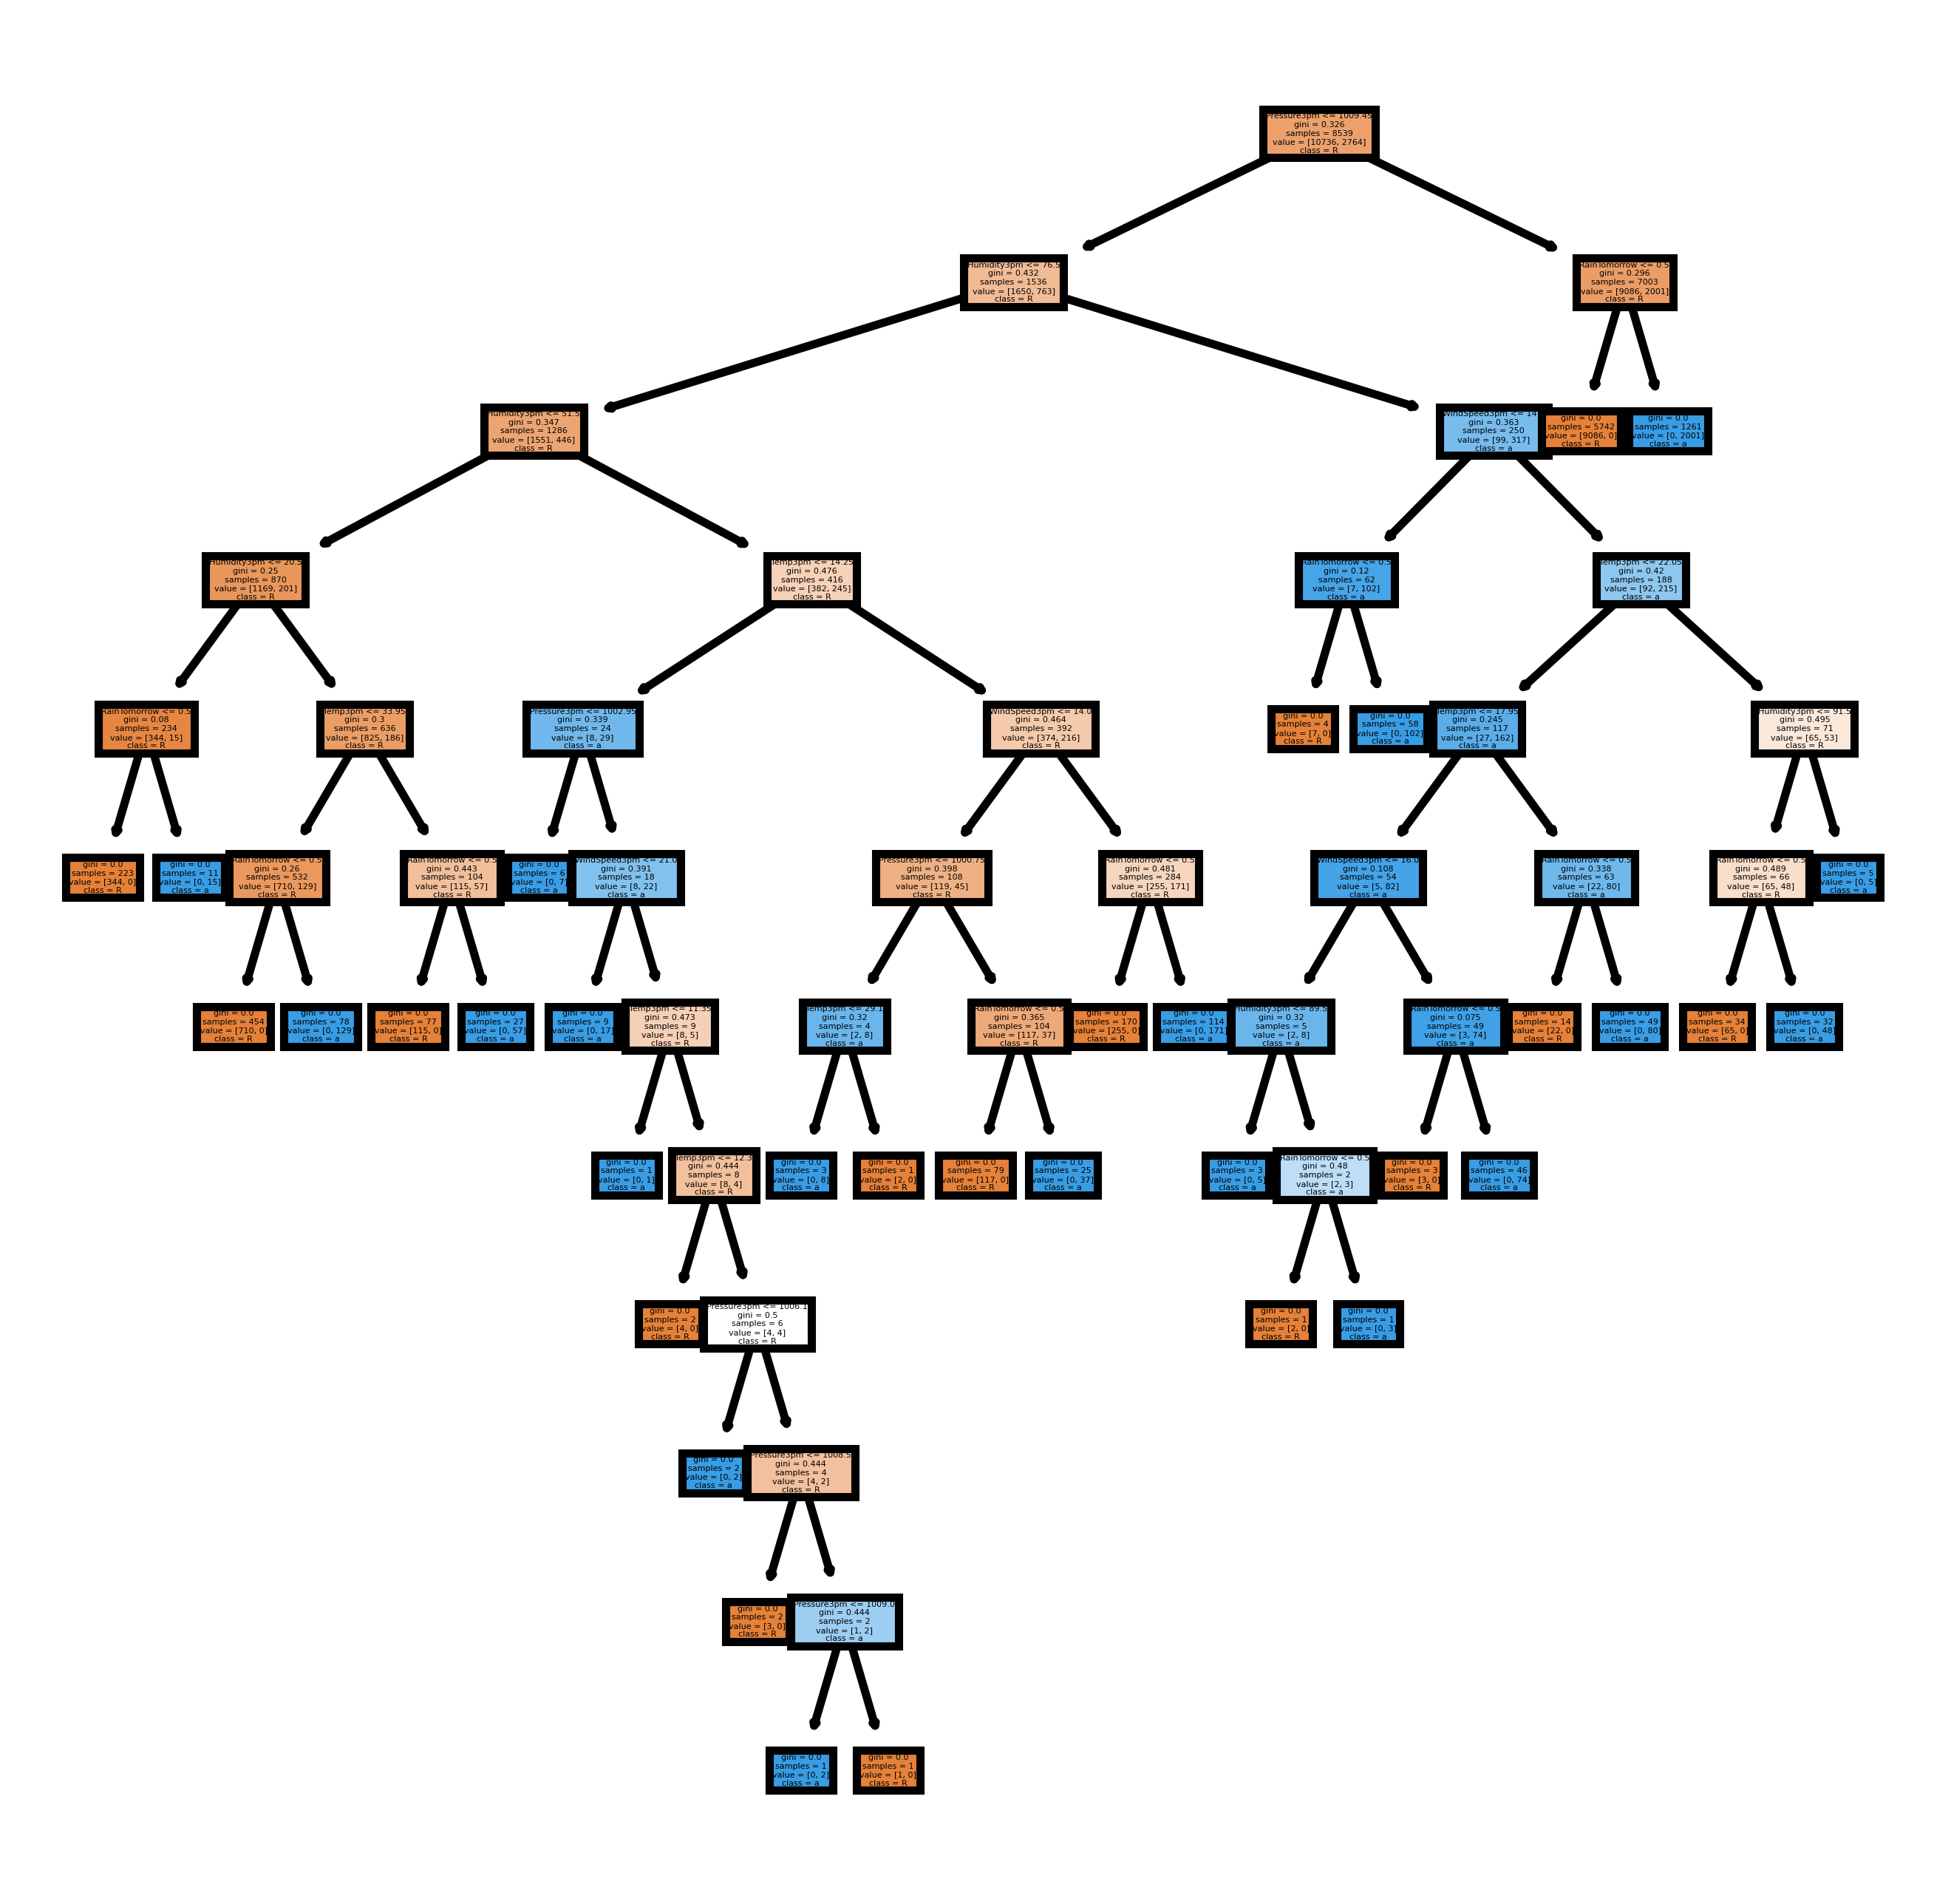

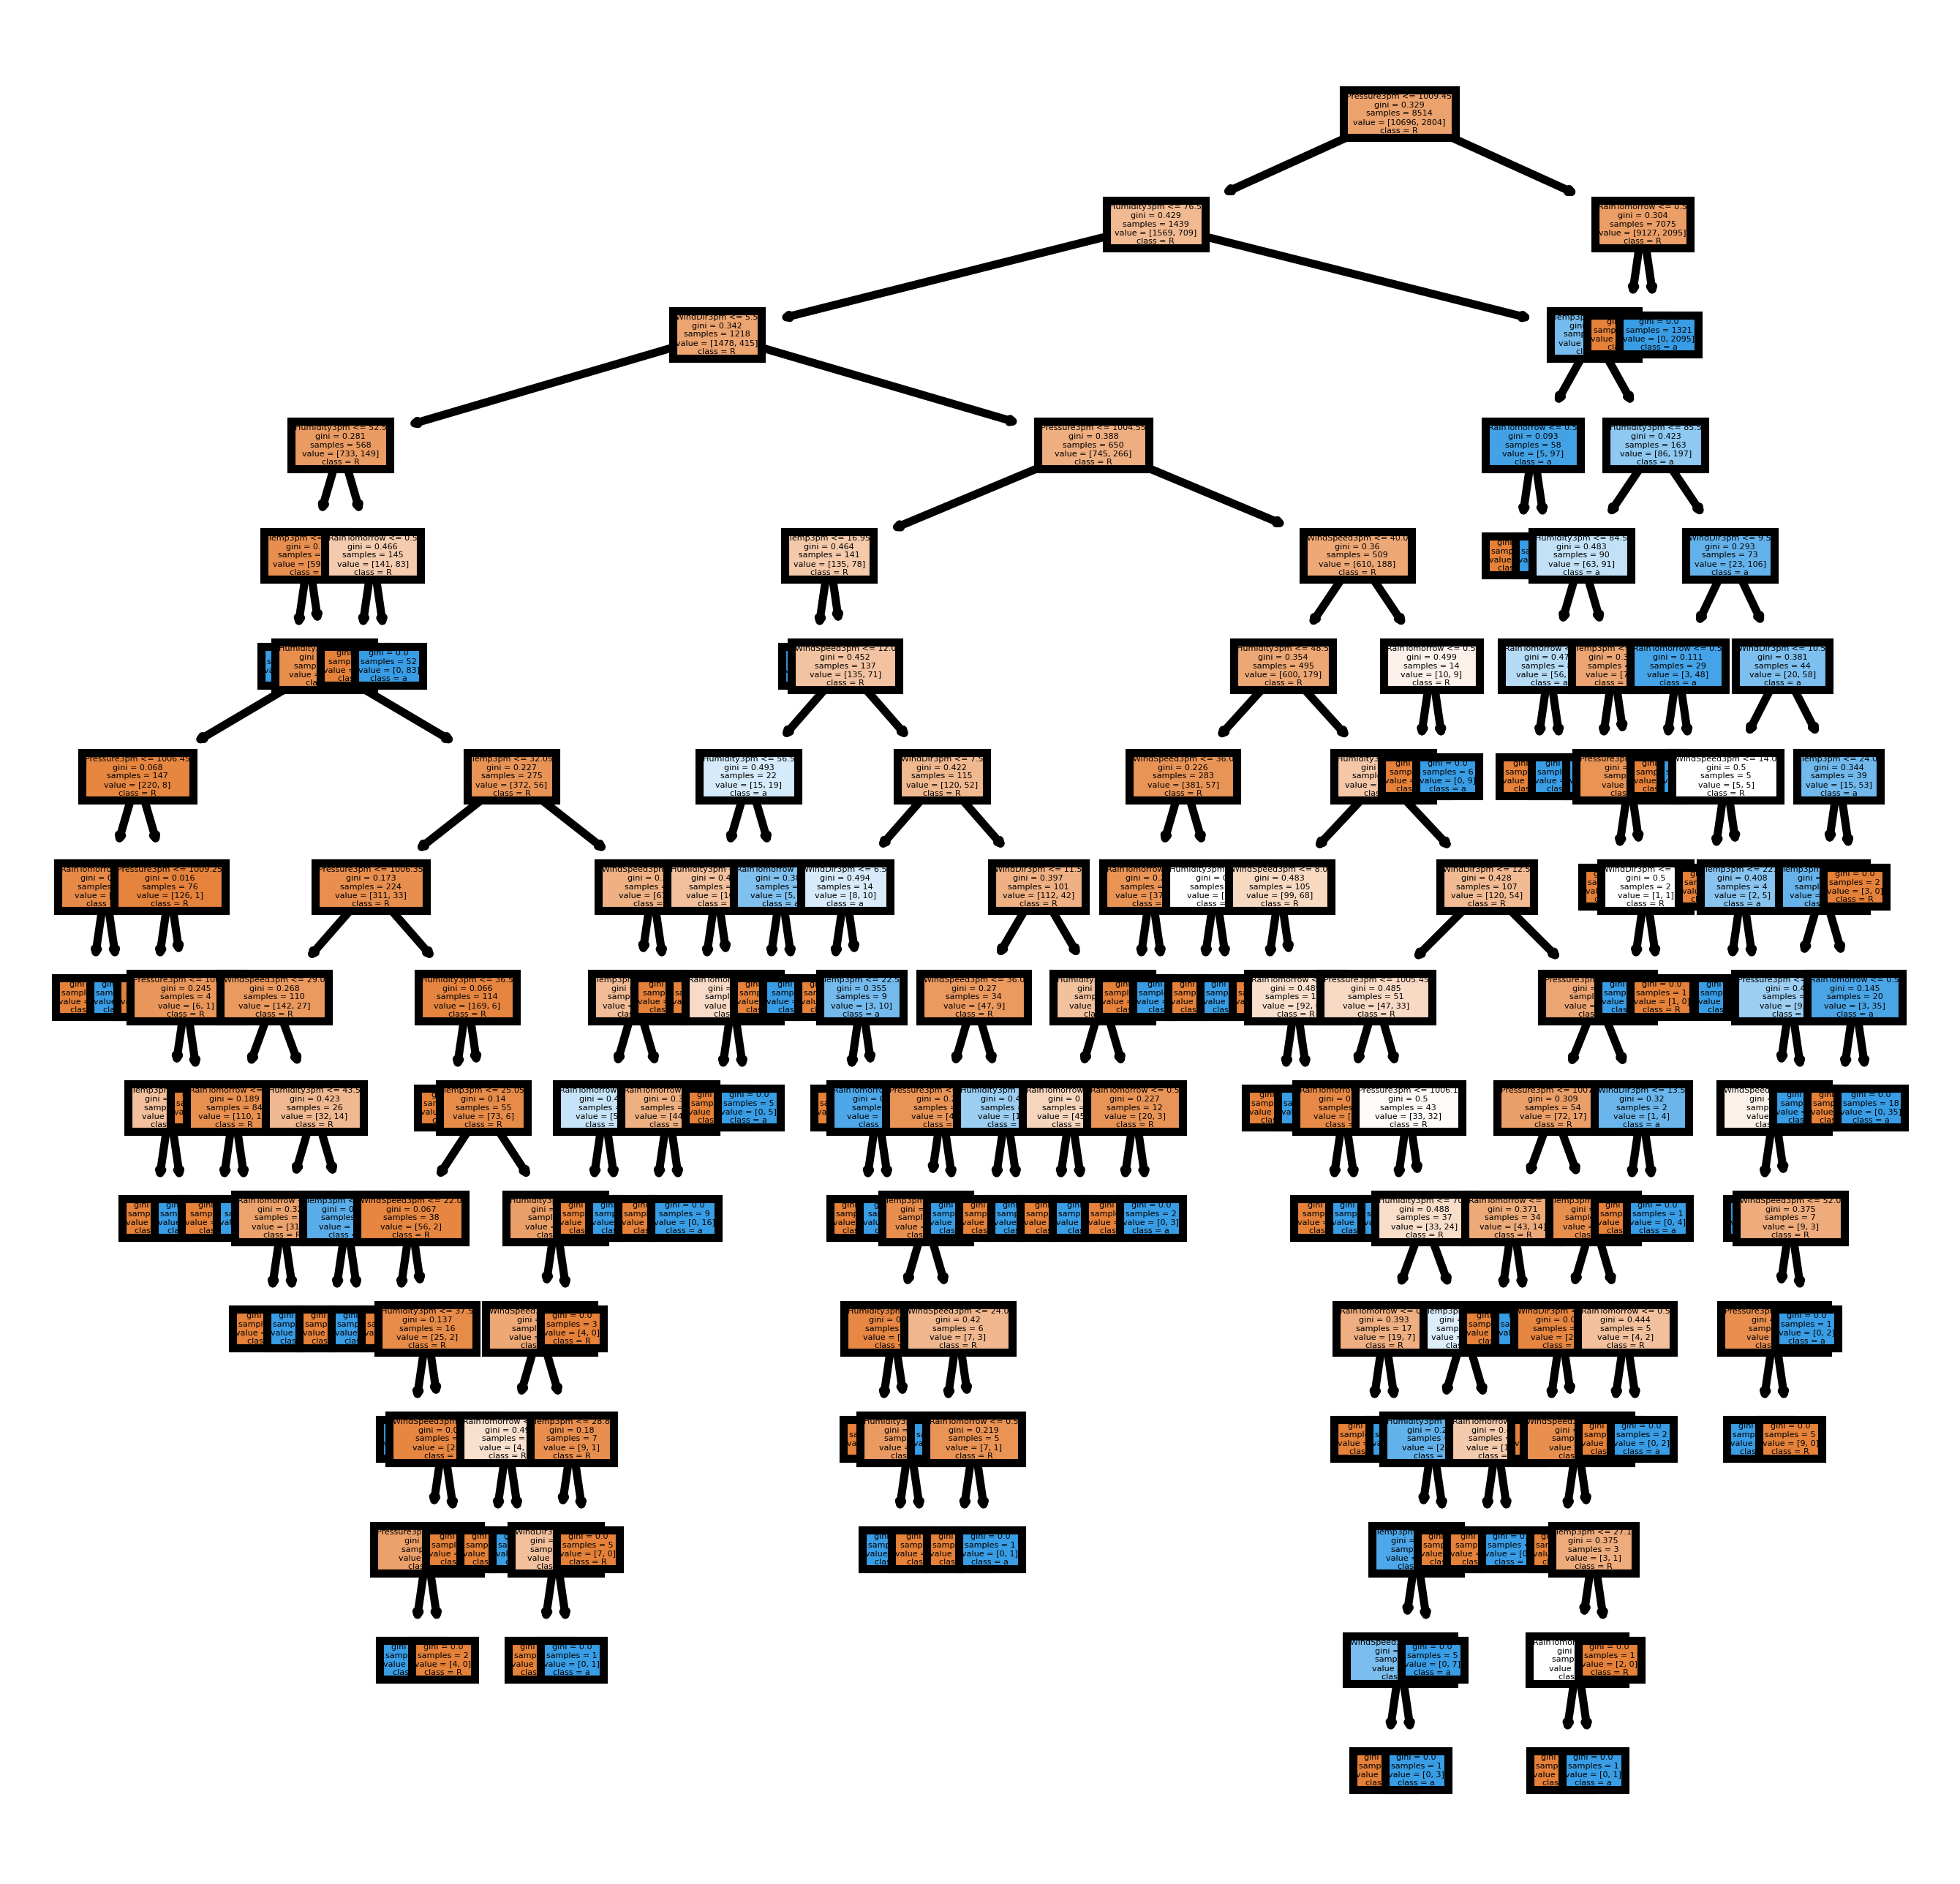

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

fn = ['Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Humidity3pm', 'WindDir3pm', 'RainTomorrow']
cn = 'RainTomorrow'

for x in range(len(randomforest_classifier.estimators_)):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    tree.plot_tree(randomforest_classifier.estimators_[x],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True);
    fig.savefig('Images/rf' + str(x) + '.png')